In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns

# set text size for plots to be larger
plt.rcParams.update({"font.size": 16})

import glob
import os
import tqdm
import plot_fuctions as pf
from plot_fuctions import load_and_process_file, get_revo_count, get_combined_count, set_paths


In [3]:
cwd = os.getcwd()
print(cwd)

/home/joe/ttop/cascade/model_analysis


In [6]:
# change current working directory to the folder where the data is stored
cwd = os.chdir("/home/joe/ttop/cascade/")
model_path = os.getcwd() + "/data/2023-04-23/model/"
agent_path = os.getcwd() + "/data/2023-04-23/agent/"

# Load Data

In [56]:
data_directory = model_path
all_files = [os.path.join(data_directory, f) for f in os.listdir(data_directory) if f.endswith('.parquet')]
all_dataframes = [load_and_process_file(file_path) for file_path in all_files]
df = pd.concat(all_dataframes, ignore_index=True)
print(df.head())
 

   Step  Seed  Citizen Count  Active Count  Support Count  Oppose Count  \
0     0   990           1120             0           1120             0   
1     1   990           1120             1           1118             1   
2     2   990           1120             1           1119             0   
3     3   990           1120             1           1117             2   
4     4   990           1120             0           1120             0   

   Jail Count  Speed of Spread  Security Density  Private Preference  \
0           0         0.000893              0.02                -0.8   
1           0         0.000000              0.02                -0.8   
2           0         0.000893              0.02                -0.8   
3           0         0.000893              0.02                -0.8   
4           0         0.000000              0.02                -0.8   

   Episilon  Threshold  Revolution                                      Model  \
0       0.5    3.66356       False 

## The expectation is that higher uncertainties with regards to state expectations in less strict authoritarian environments causes more frequent but slower spreading resistance cascades with fewer equilibrium flips and more oscillations.

In [57]:
unique_model_count = df["Model"].nunique()
print(f"There are {unique_model_count} unique values in the 'model' column.")

There are 5085 unique values in the 'model' column.


In [58]:
# Filter the DataFrame for rows with a Security Density value of 0.00
df_sd_0 = df[df["Security Density"] == 0.00]

# Filter the original DataFrame for rows with a Security Density value NOT equal to 0.00
df = df[df["Security Density"] != 0.00]

unique_model_count = df_sd_0["Model"].nunique()
print(f"There are {unique_model_count} unique values in the 'model' column.")
unique_model_count = df["Model"].nunique()
print(f"There are {unique_model_count} unique values in the 'model' column.")
get_revo_count(df_sd_0)
get_revo_count(df)
df_sd_0 = get_combined_count(df_sd_0)
df = get_combined_count(df)

There are 0 unique values in the 'model' column.
There are 5085 unique values in the 'model' column.
0 different 'models' had a revolution.
0 different 'models' had a revolution.
0 models had more than half of the population active or opposing.
1422 models had more than half of the population active or opposing.


In [60]:
# change name of column from Episilon to Epsilon
df_sd_0 = df_sd_0.rename(columns={'Episilon': 'Epsilon'})
df = df.rename(columns={'Episilon': 'Epsilon'})
df_sd_0 = df_sd_0.rename(columns={'model': 'Model'})
df = df.rename(columns={'model': 'Model'})
df = df[df["Seed"].isin([990, 991, 992, 993])]

# The Other Model Runs with Security

In [19]:
for threshold in sorted(df['Threshold'].unique()):
    print(threshold)
    pf.revo_count_ep_sd_plot(df[df['Threshold'] == threshold], str(threshold))

0.0


ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>

0.0


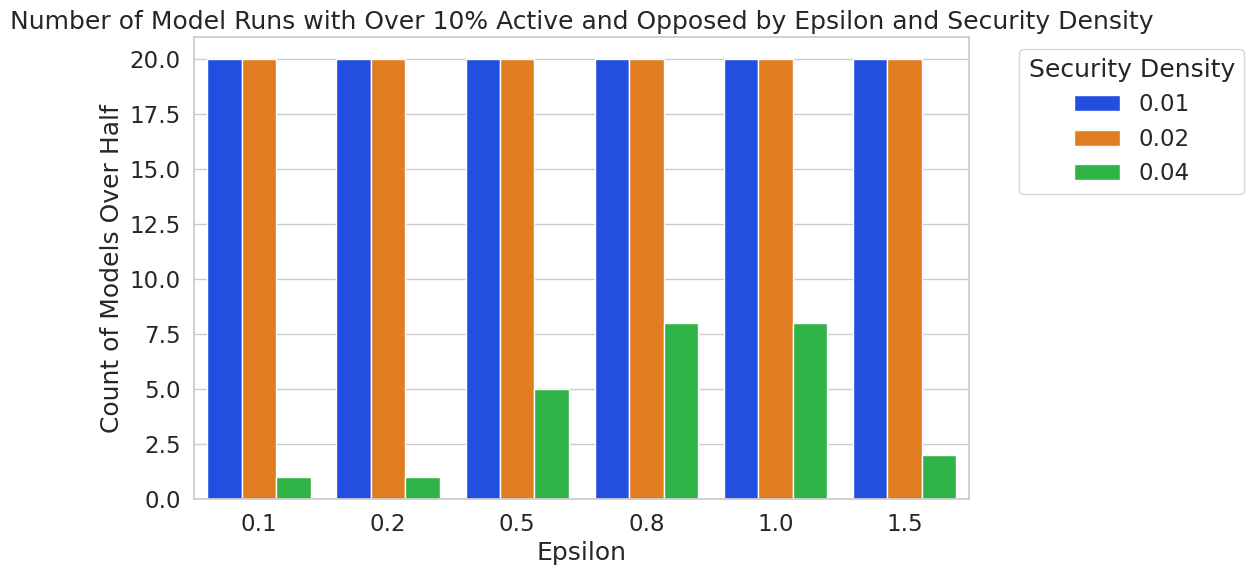

1.38629


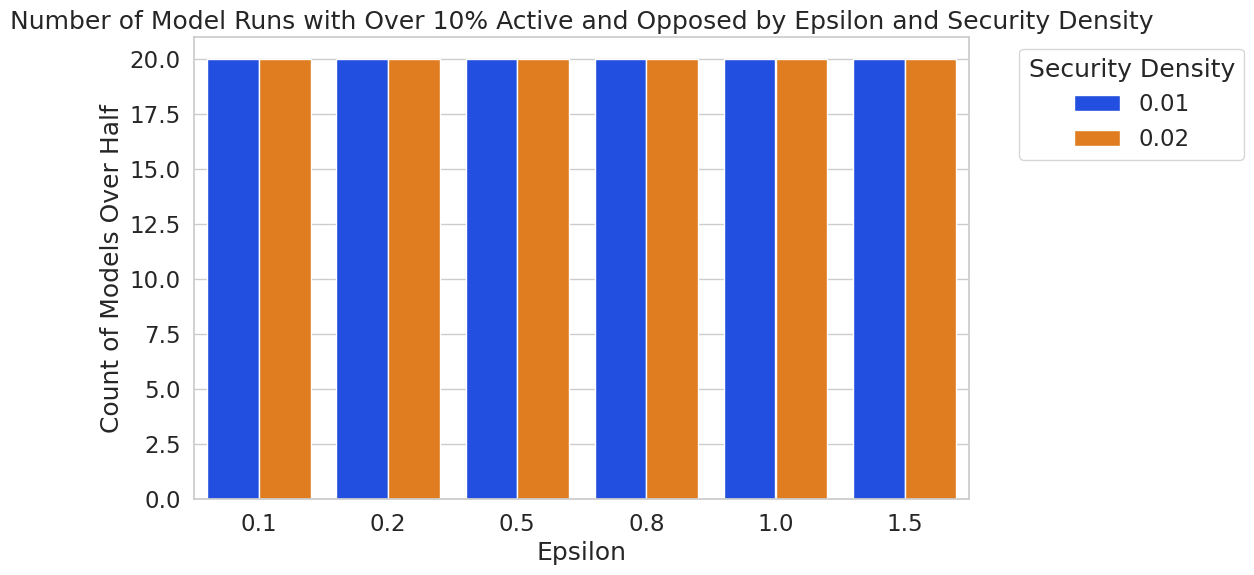

1.7346


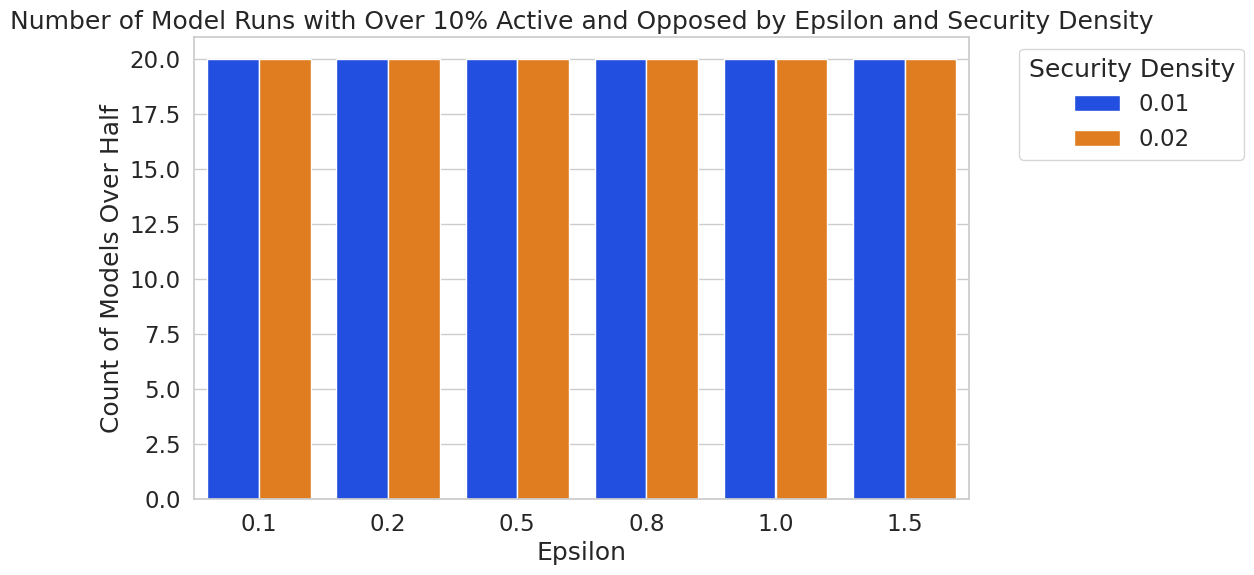

2.19722


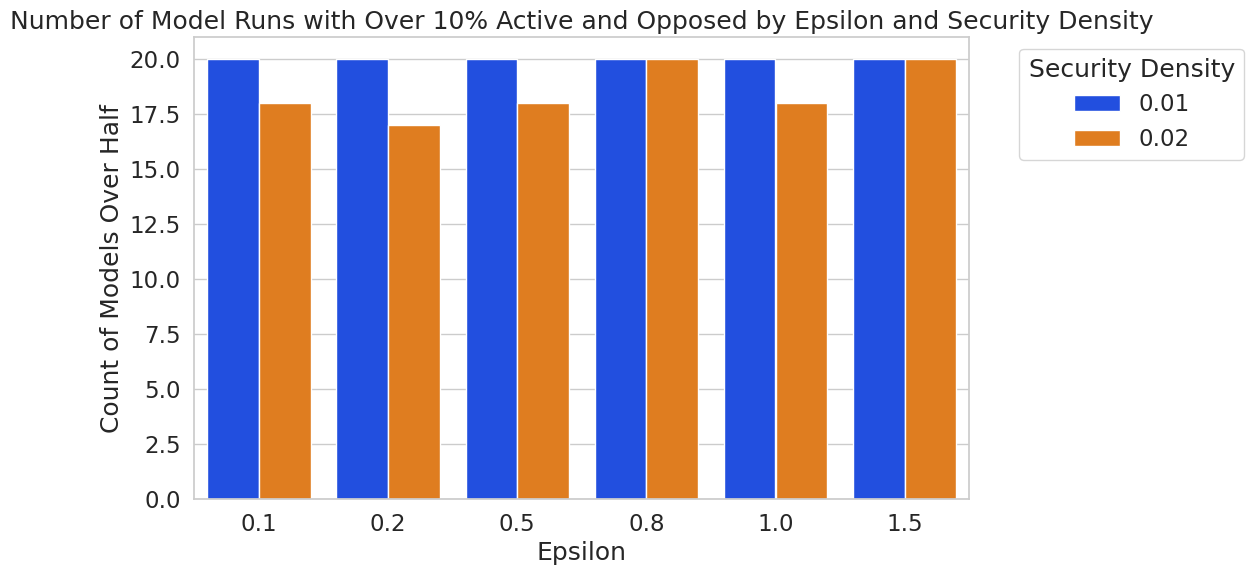

2.94444


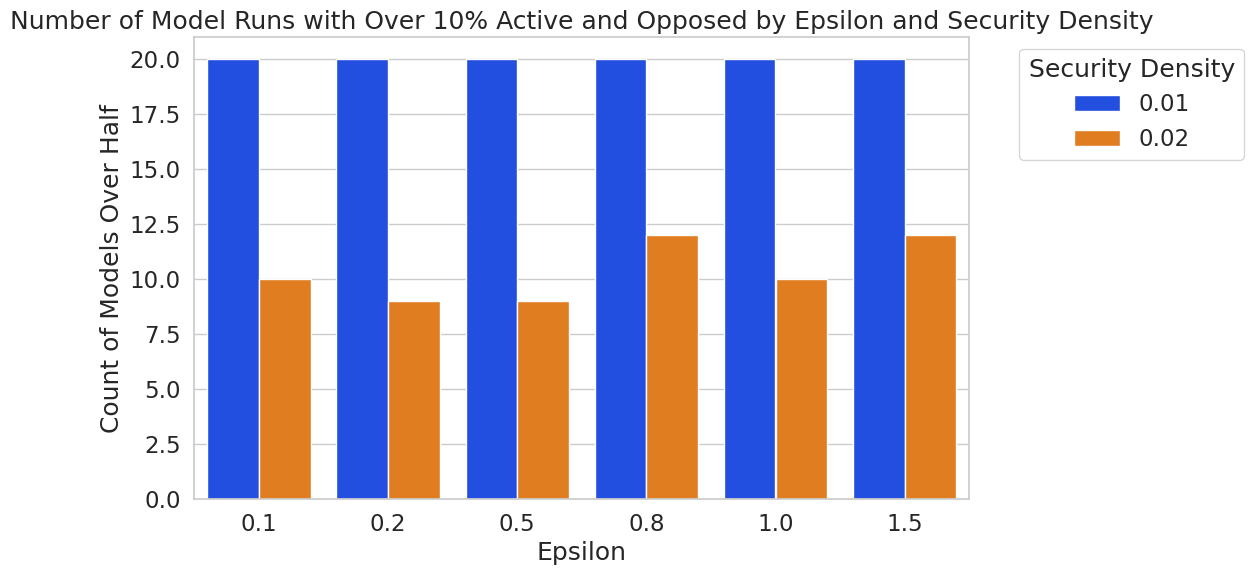

3.66356


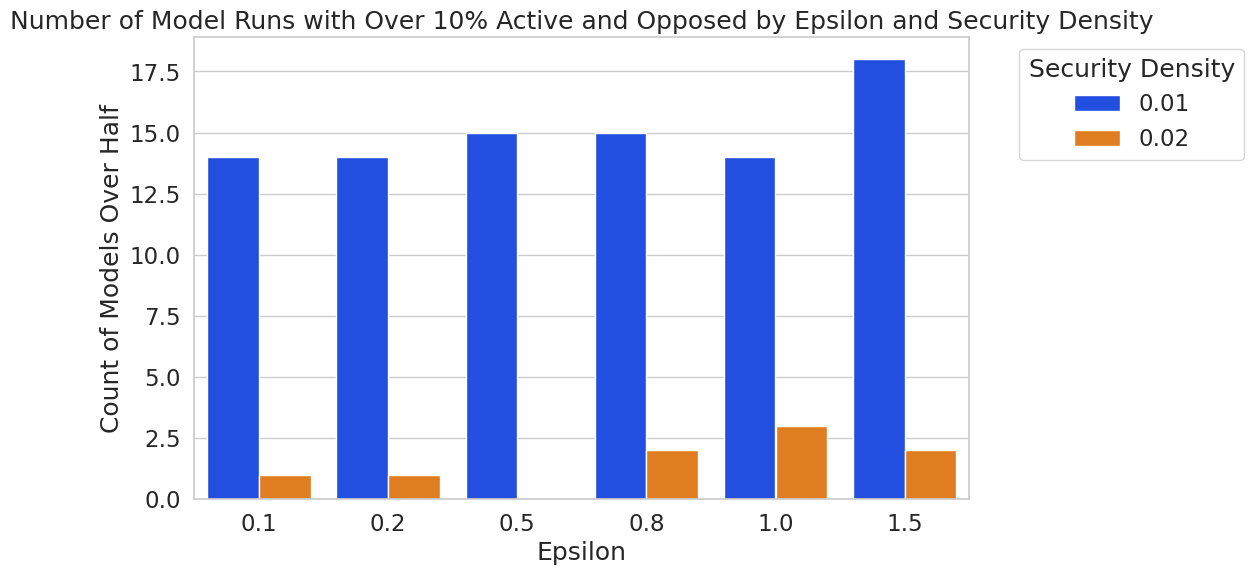

4.18459


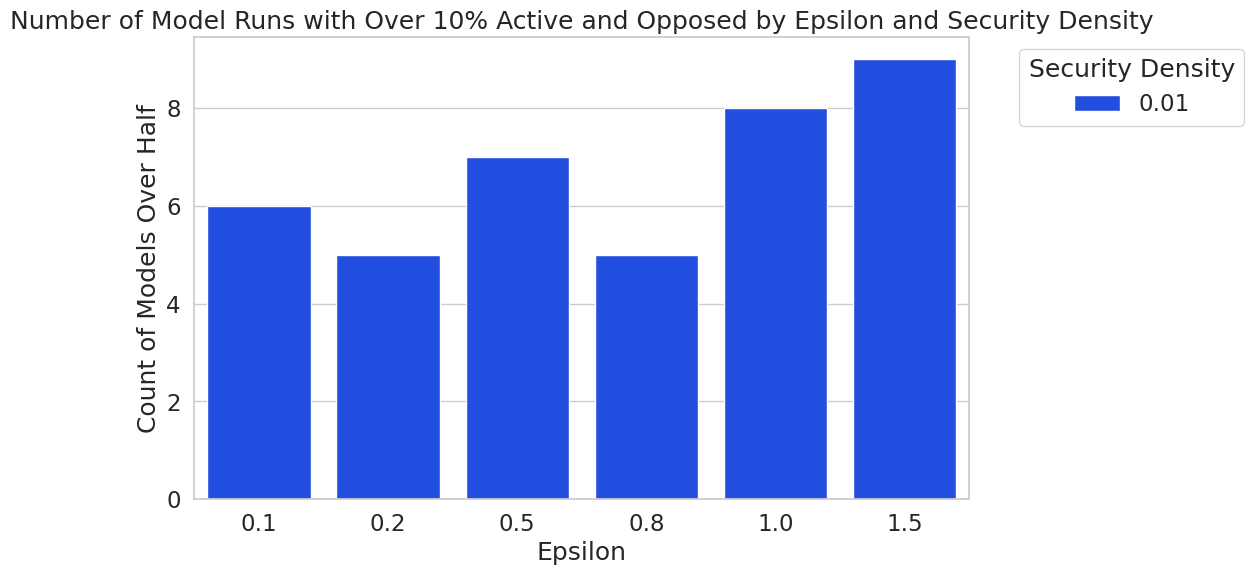

4.59512


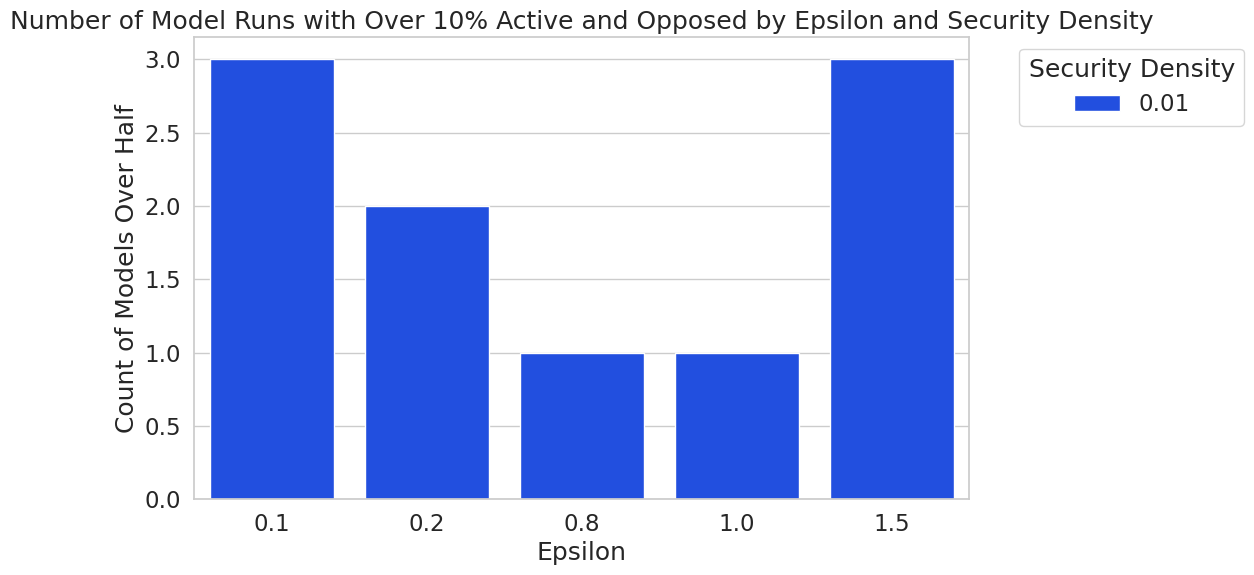

In [61]:
for threshold in sorted(df['Threshold'].unique()):
    print(threshold)
    pf.over_half_ep_sd_plot(df[df['Threshold'] == threshold], str(threshold))

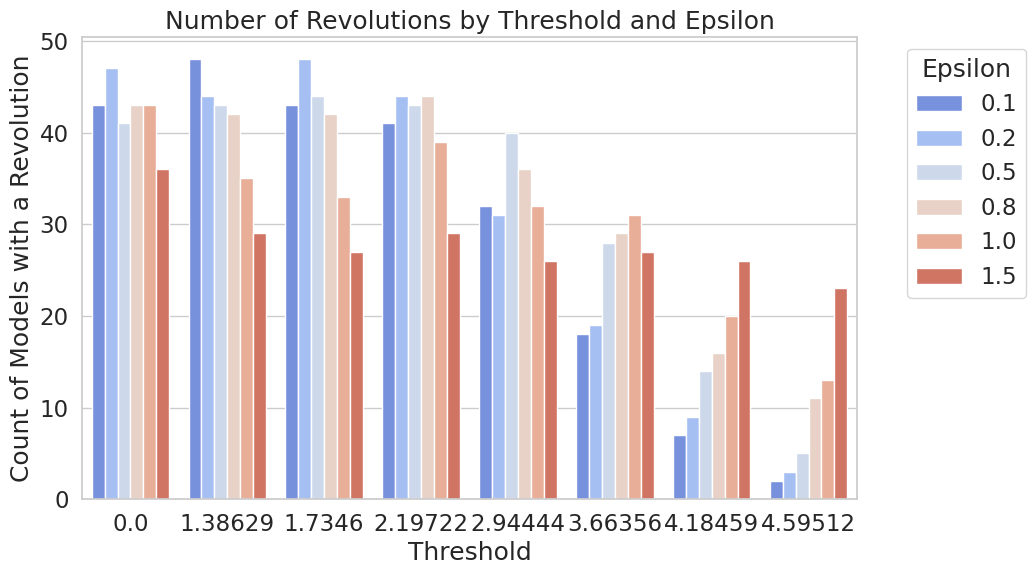

In [110]:
pf.revo_count_ep_th_plot(df)

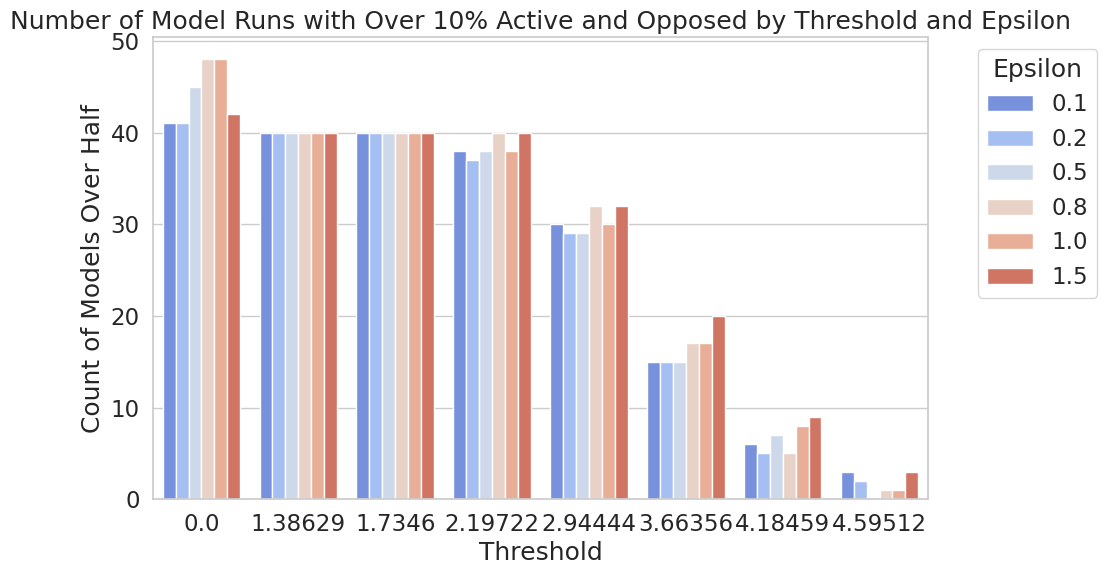

In [62]:
pf.over_half_ep_th_plot(df, 'test')

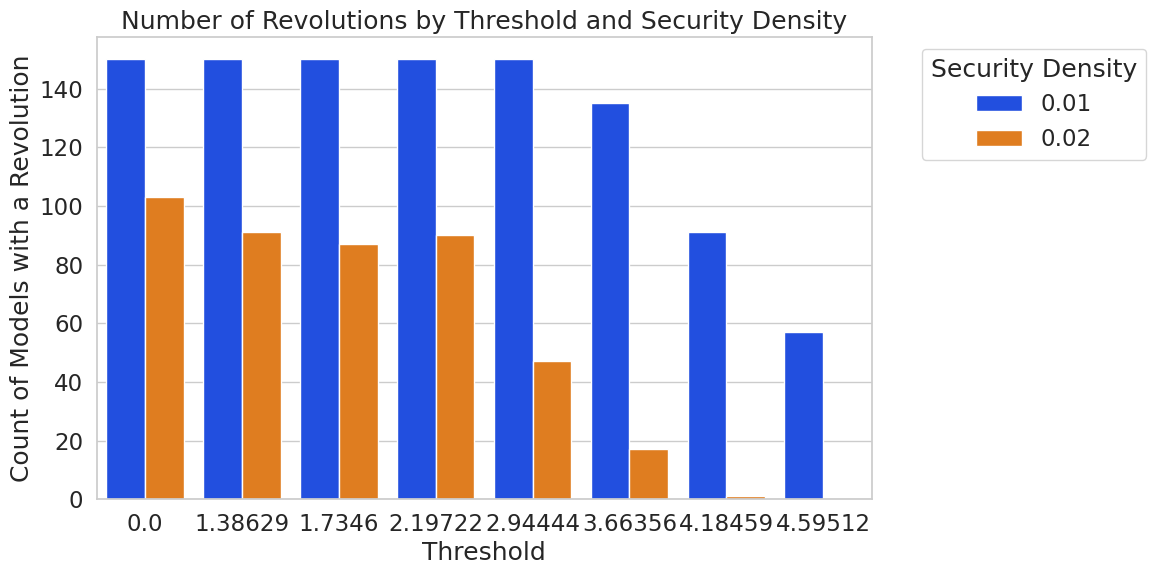

In [114]:
pf.revo_count_sd_th_plot(df)

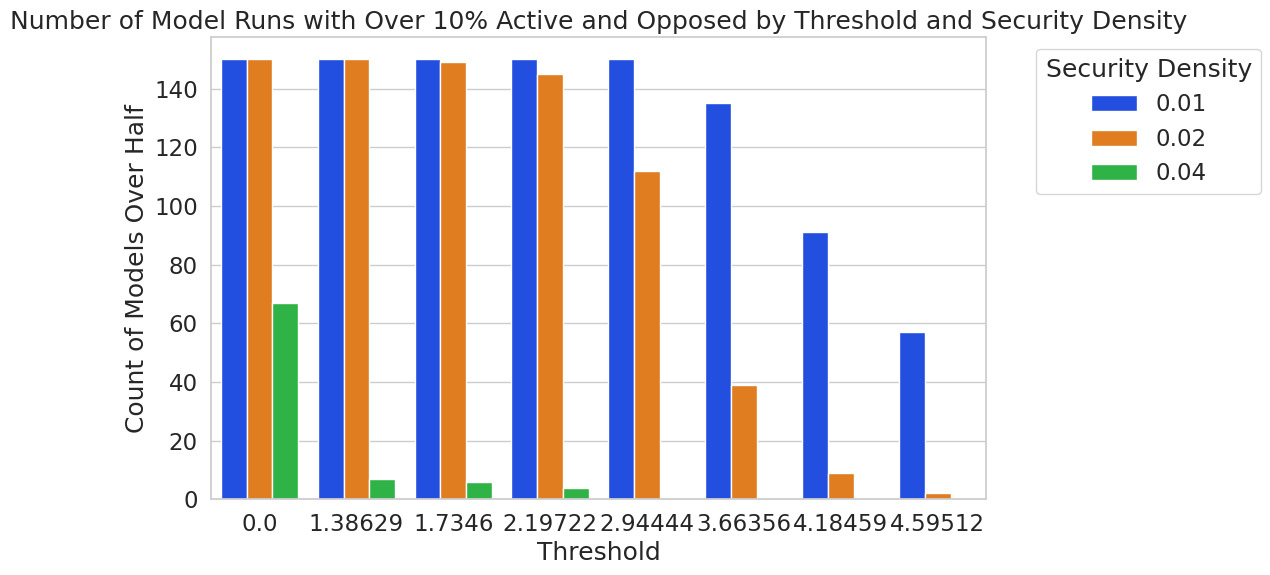

In [115]:
pf.over_half_sd_th_plot(df)

In [23]:
# Filter the final_df DataFrame
filtered_df = df[df["Revolution"] == True]

# Group the filtered DataFrame by Epsilon and Security Density and count the unique models
model_count_by_epsilon_sd = filtered_df.groupby(["Security Density", "Epsilon"])[
    "Model"
].nunique()

# Display the count of models by Epsilon values
print(model_count_by_epsilon_sd)


Series([], Name: Model, dtype: int64)


In [24]:
# Filter the final_df DataFrame
filtered_df = df[df["Revolution"] == True]

# Group the filtered DataFrame by Epsilon and Security Density and count the unique models
model_count_by_threshold_sd = filtered_df.groupby(["Threshold", "Epsilon"])[
    "Model"
].nunique()

# Display the count of models by Epsilon values
print(model_count_by_threshold_sd)


Series([], Name: Model, dtype: int64)


In [63]:
# Filter the final_df DataFrame for rows with a combined count of Active and Oppo > 112
filtered_df = df[df["Combined Count"] > 112]

model_count_by_epsilon = filtered_df.groupby("Epsilon")["Model"].nunique()

# Display the count of models by Epsilon values
print(model_count_by_epsilon)

Epsilon
0.1    213
0.2    209
0.5    214
0.8    223
1.0    223
1.5    247
Name: Model, dtype: int64


In [64]:
# Filter the final_df DataFrame for rows with a combined count of Active and Oppo > 112
filtered_df = df[df["Combined Count"] > 112]

model_count_by_epsilon = filtered_df.groupby(["Threshold", "Epsilon"])["Model"].nunique()

# Display the count of models by Epsilon values
print(model_count_by_epsilon)

Threshold  Epsilon
0.00000    0.1        41
           0.2        41
           0.5        45
           0.8        48
           1.0        49
           1.5        59
1.38629    0.1        40
           0.2        40
           0.5        40
           0.8        40
           1.0        40
           1.5        43
1.73460    0.1        40
           0.2        40
           0.5        40
           0.8        40
           1.0        40
           1.5        41
2.19722    0.1        38
           0.2        37
           0.5        38
           0.8        40
           1.0        38
           1.5        40
2.94444    0.1        30
           0.2        29
           0.5        29
           0.8        32
           1.0        30
           1.5        32
3.66356    0.1        15
           0.2        15
           0.5        15
           0.8        17
           1.0        17
           1.5        20
4.18459    0.1         6
           0.2         5
           0.5         7
      

0.0


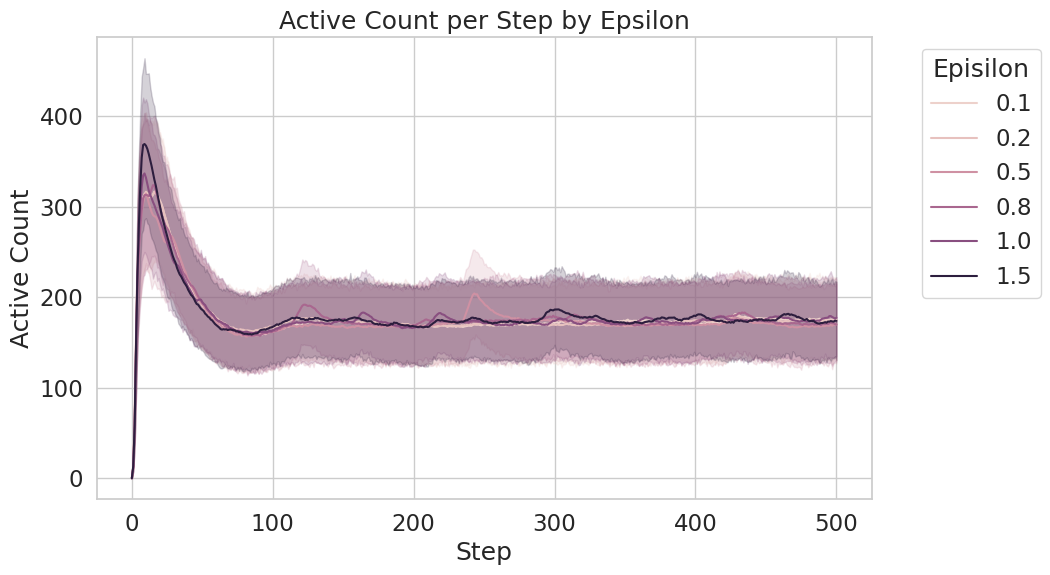

1.38629


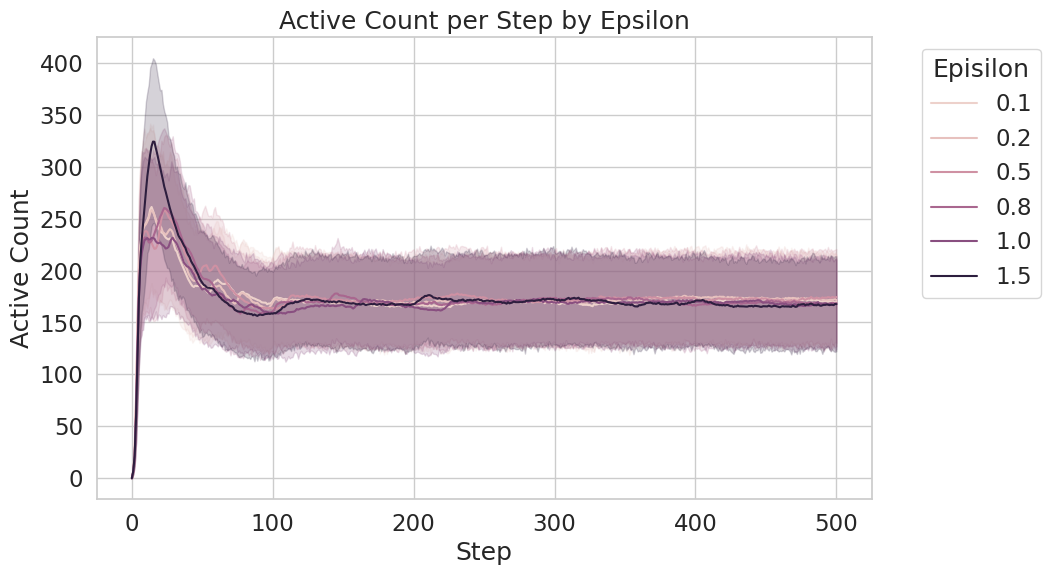

1.7346


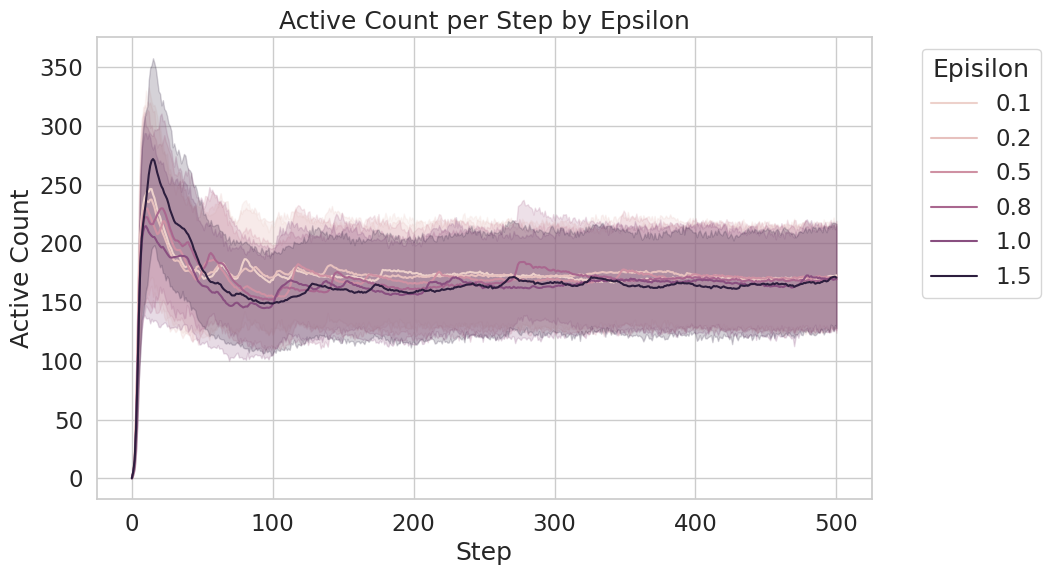

2.19722


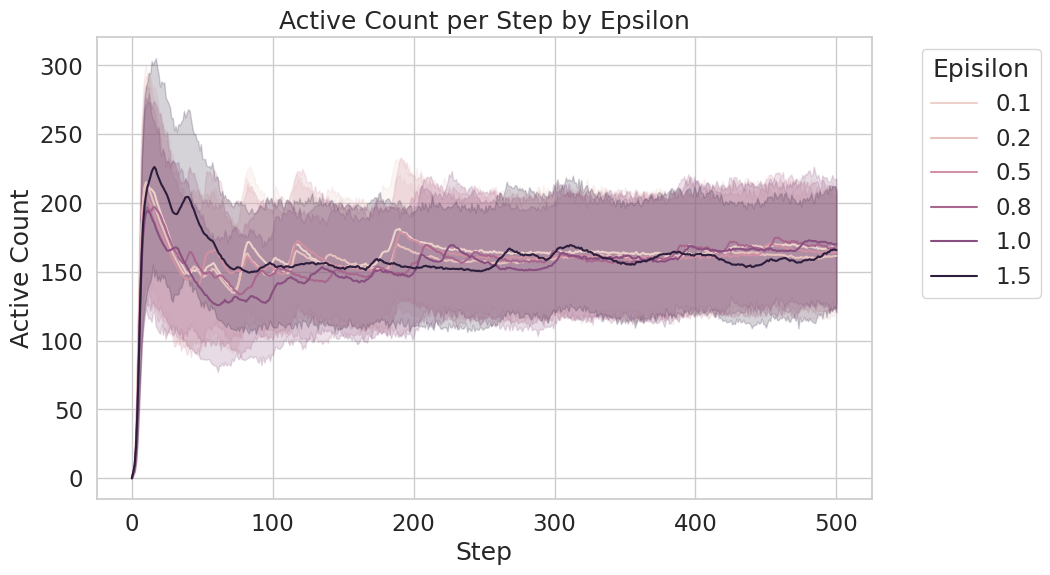

2.94444


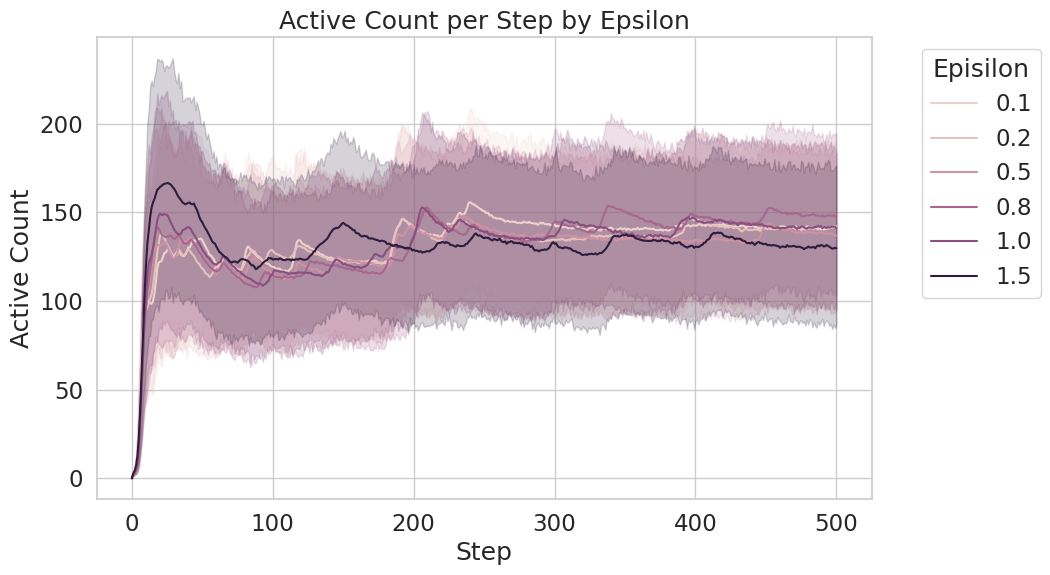

3.66356


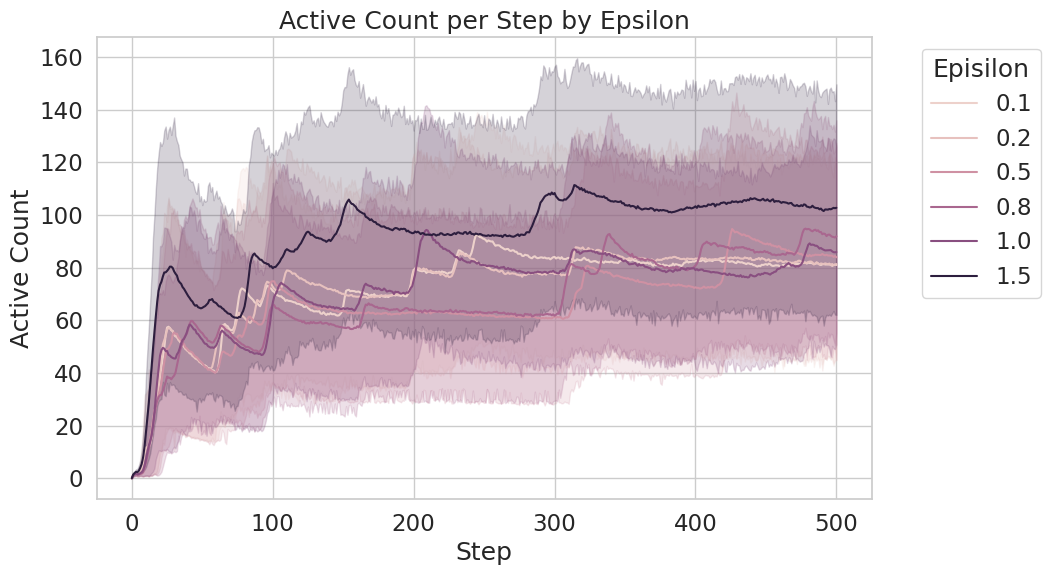

4.18459


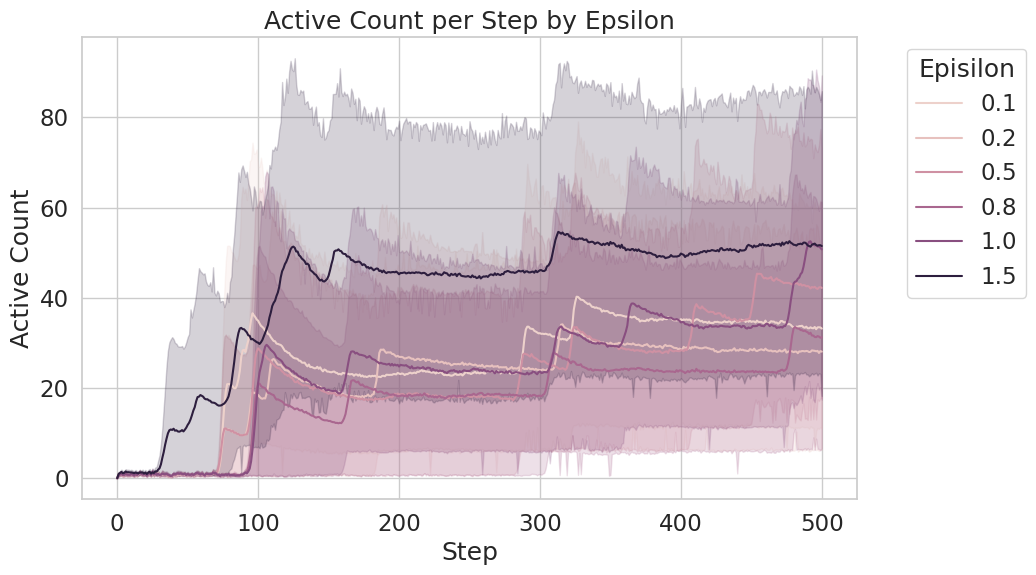

4.59512


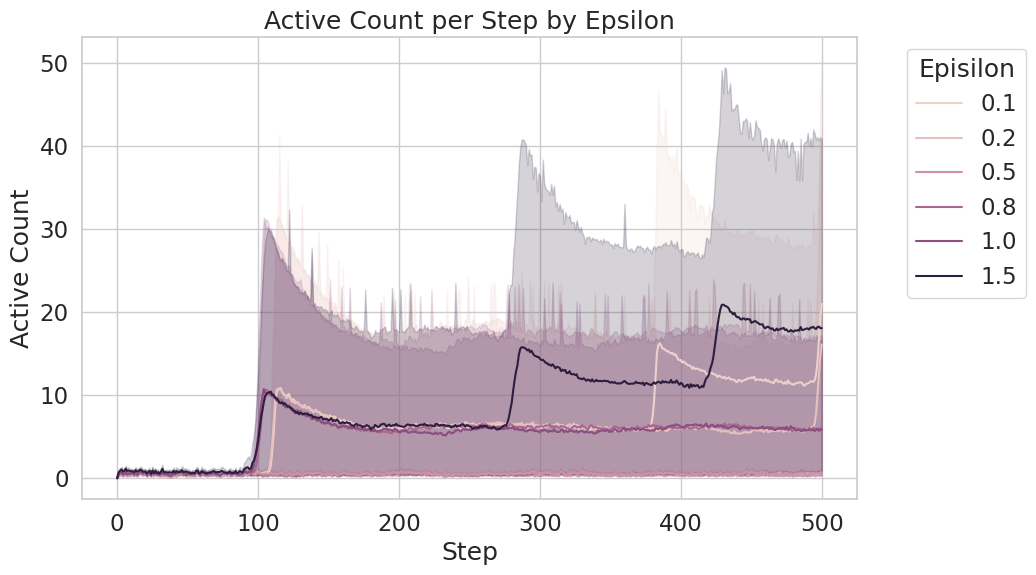

In [65]:
for threshold in sorted(df['Threshold'].unique()):
    print(threshold)
    pf.active_count_ep_plot(df[df['Threshold'] == threshold], str(threshold))

0.0


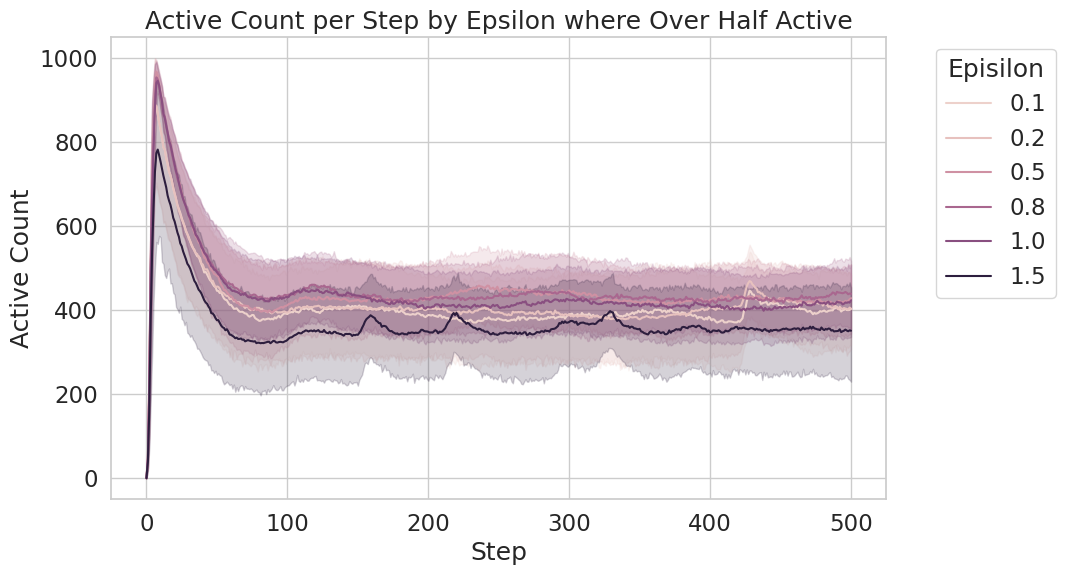

1.38629


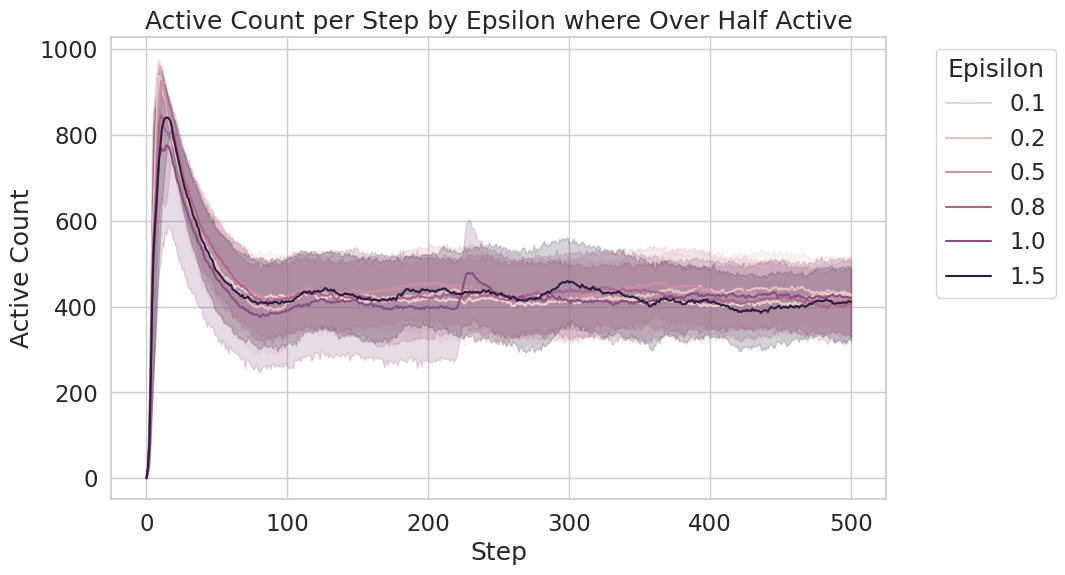

1.7346


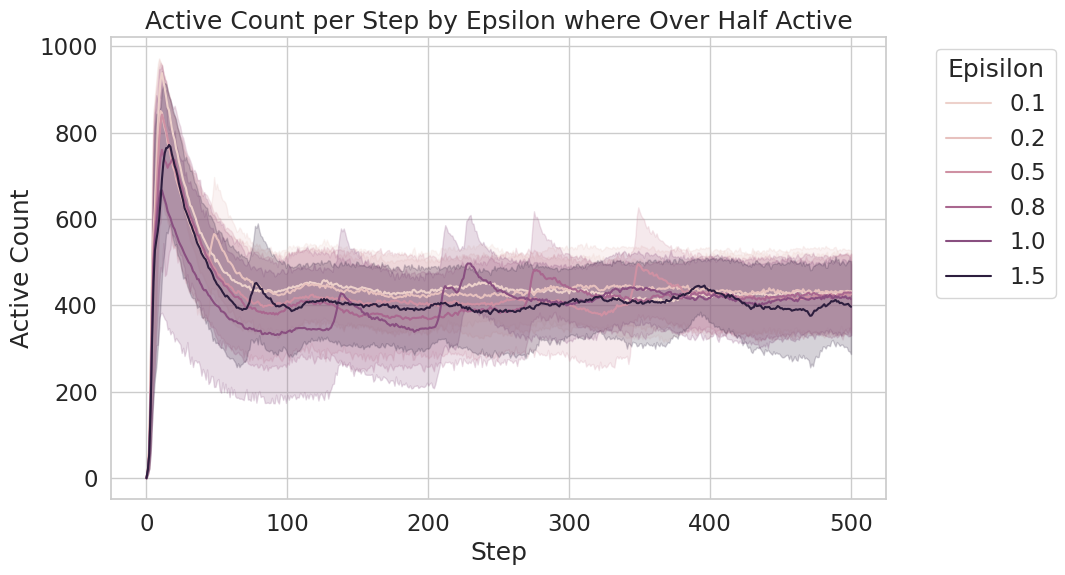

2.19722


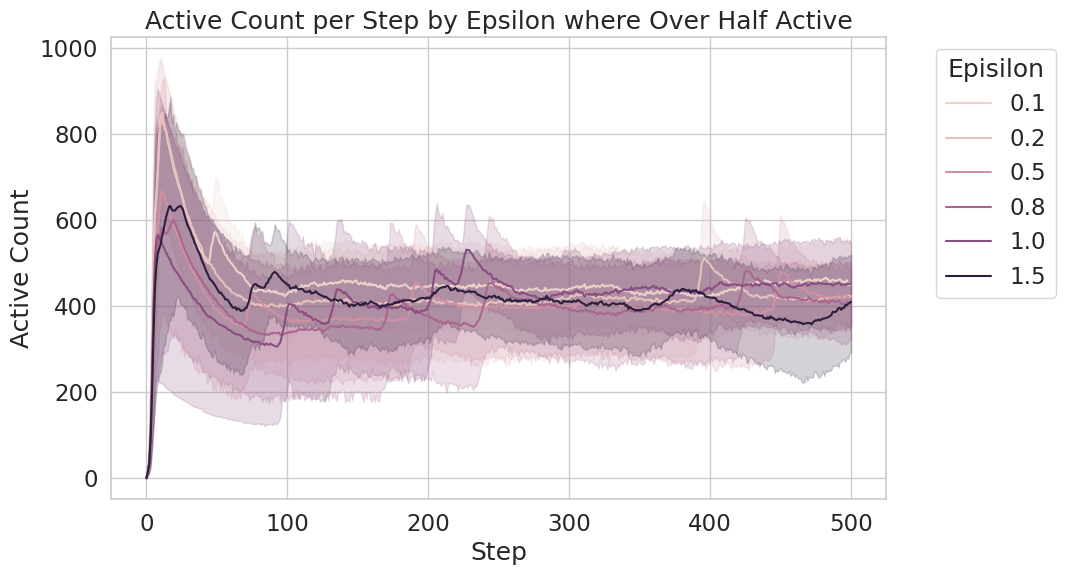

2.94444


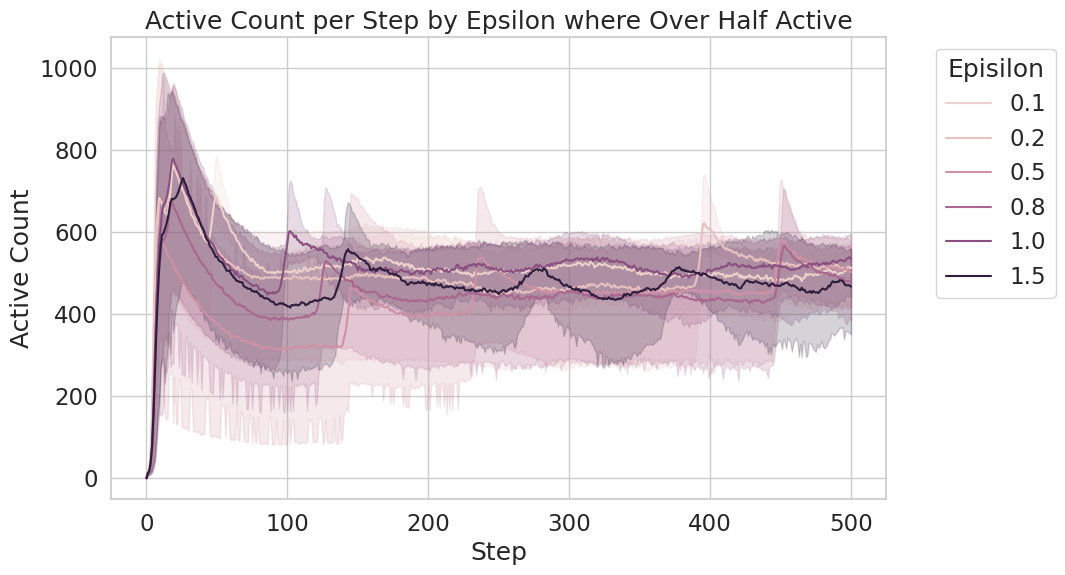

3.66356


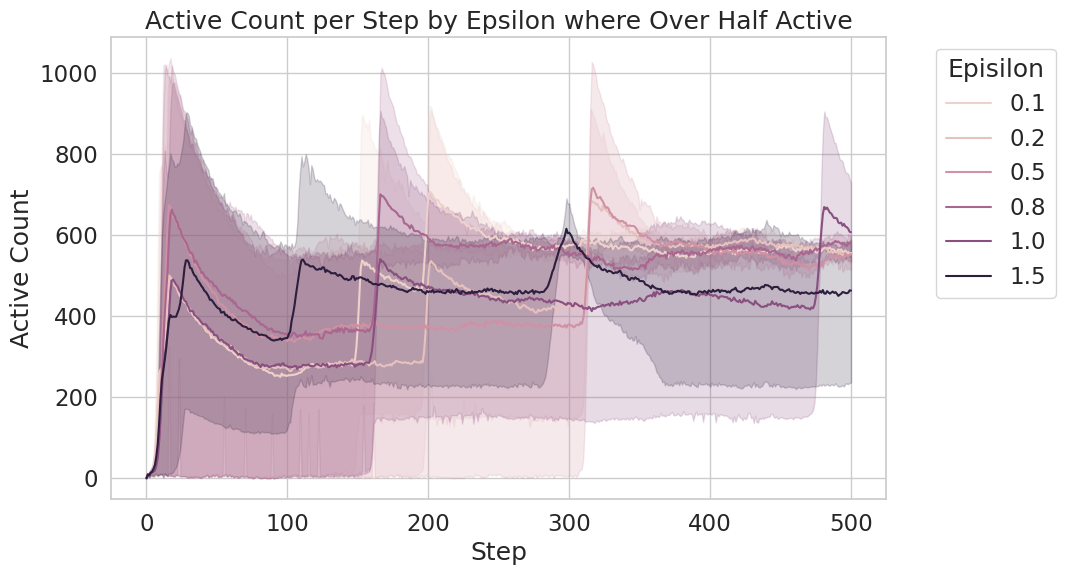

4.18459


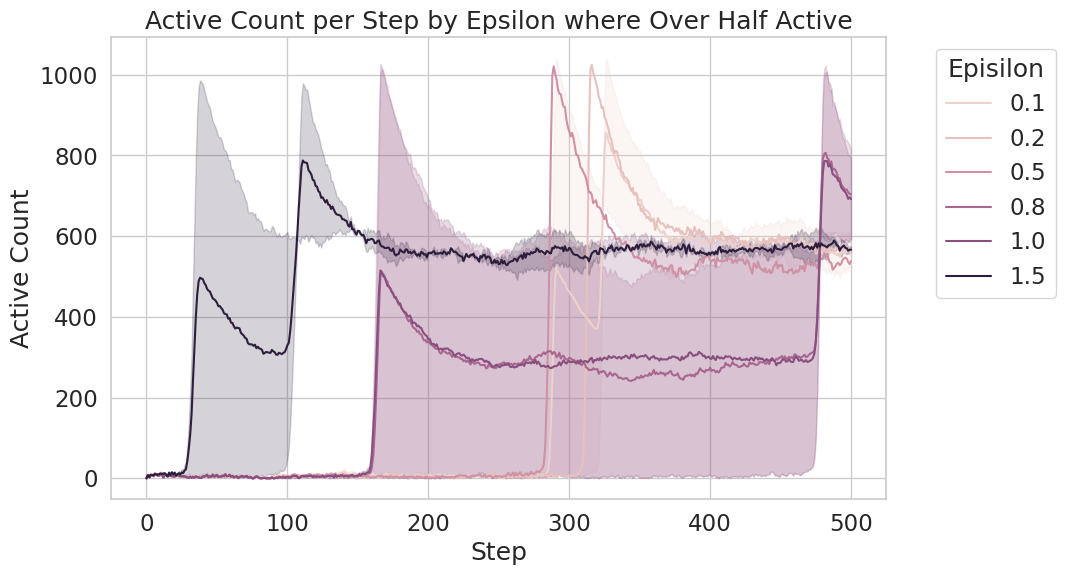

4.59512


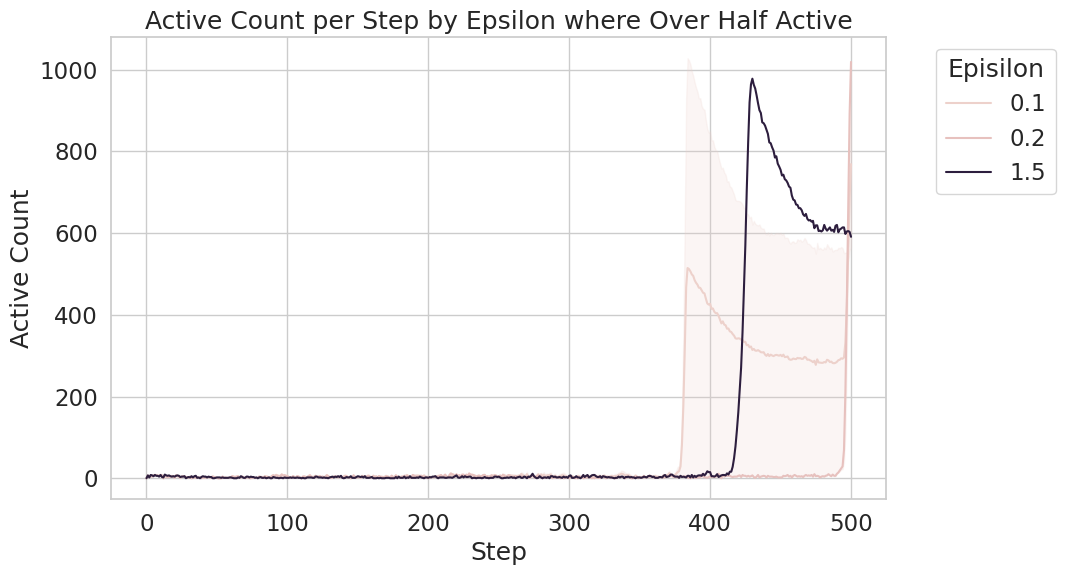

In [28]:
for threshold in sorted(df['Threshold'].unique()):
    print(threshold)
    pf.over_half_active_count_ep_plot(df[df['Threshold'] == threshold], str(threshold))

0.0


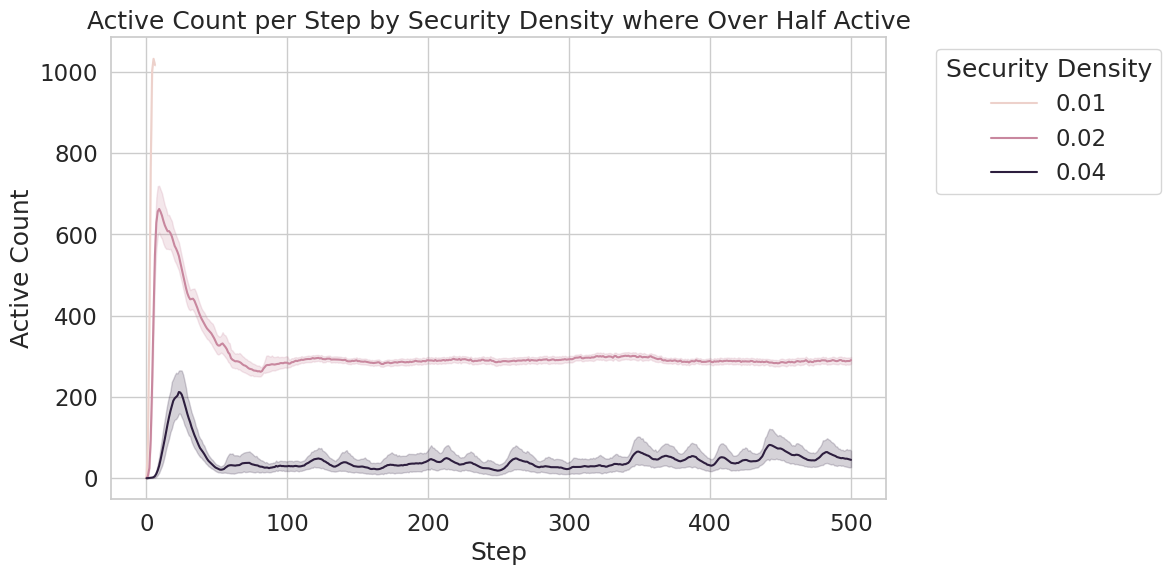

1.38629


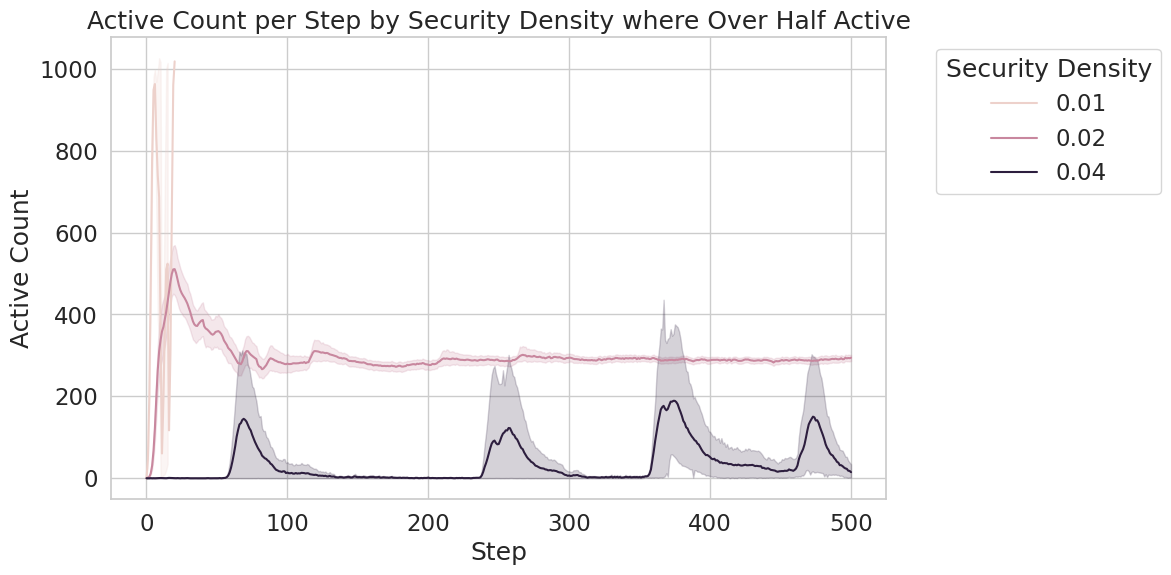

1.7346


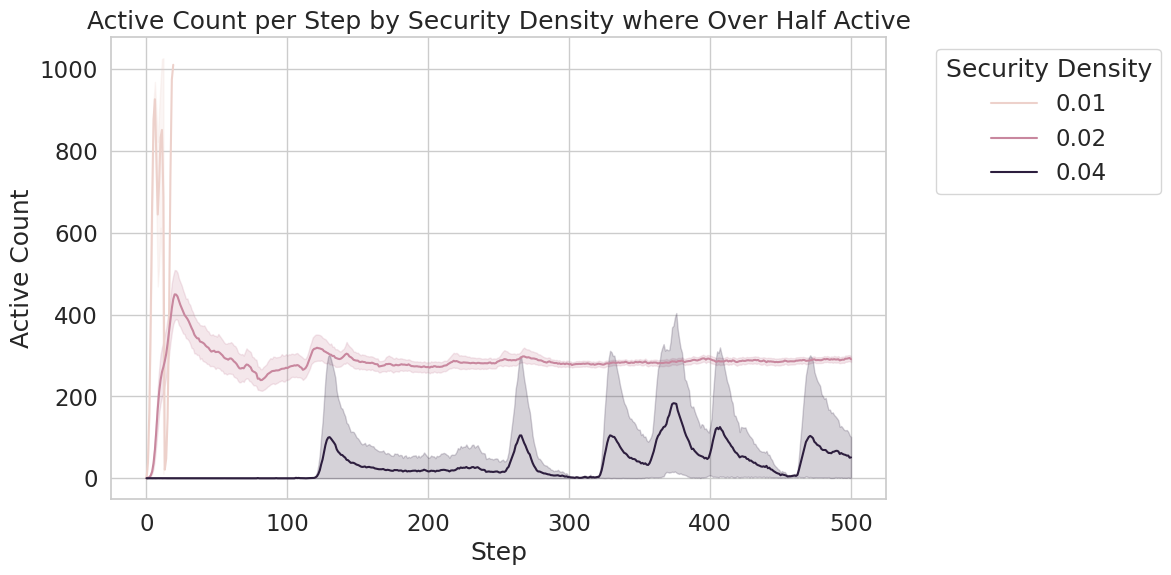

2.19722


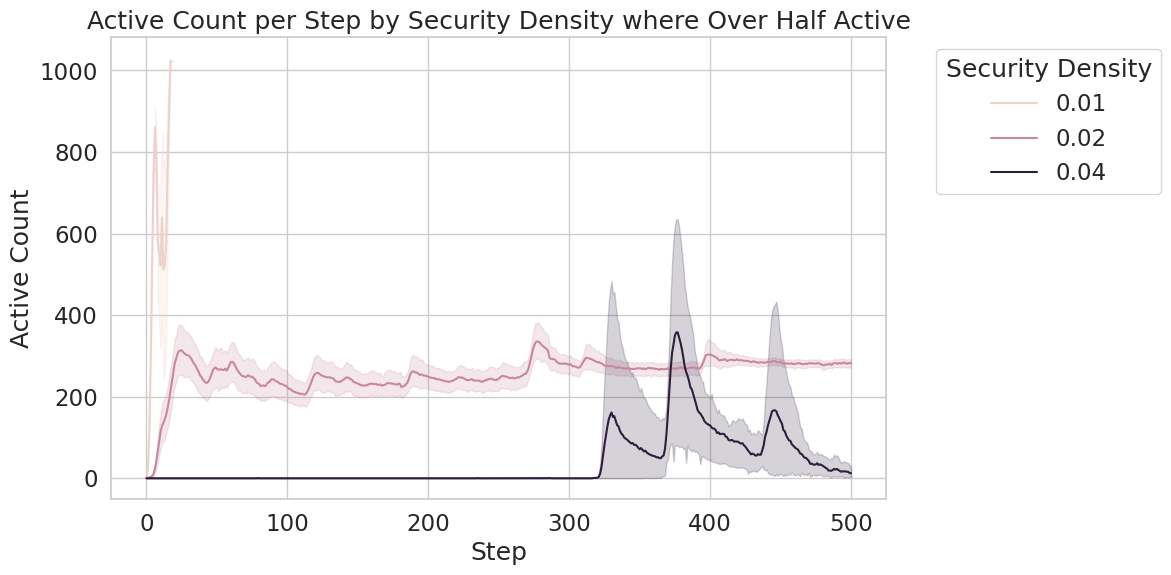

2.94444


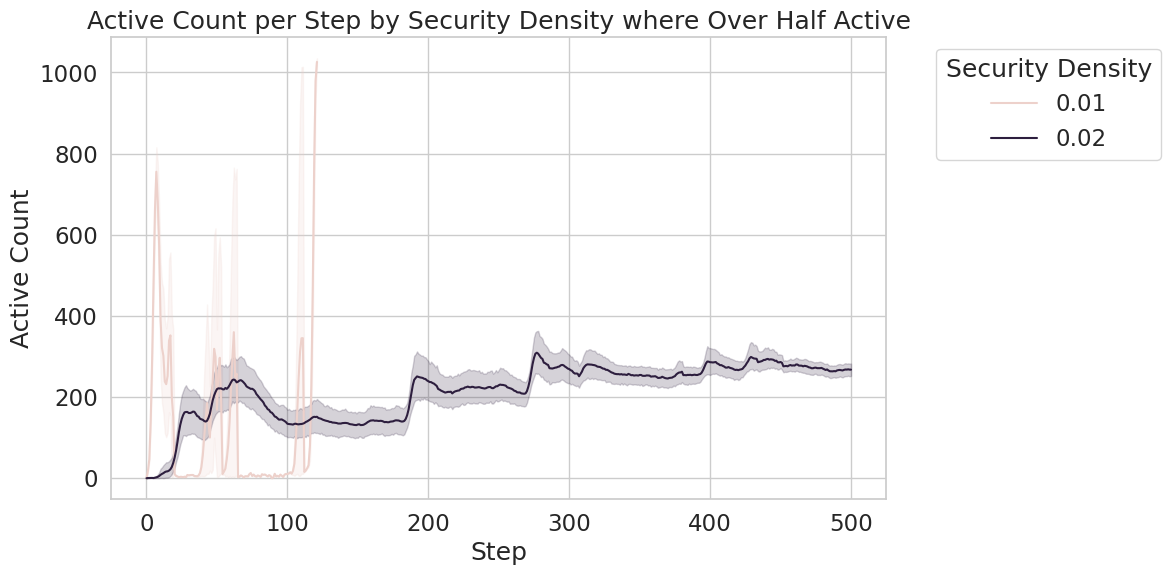

3.66356


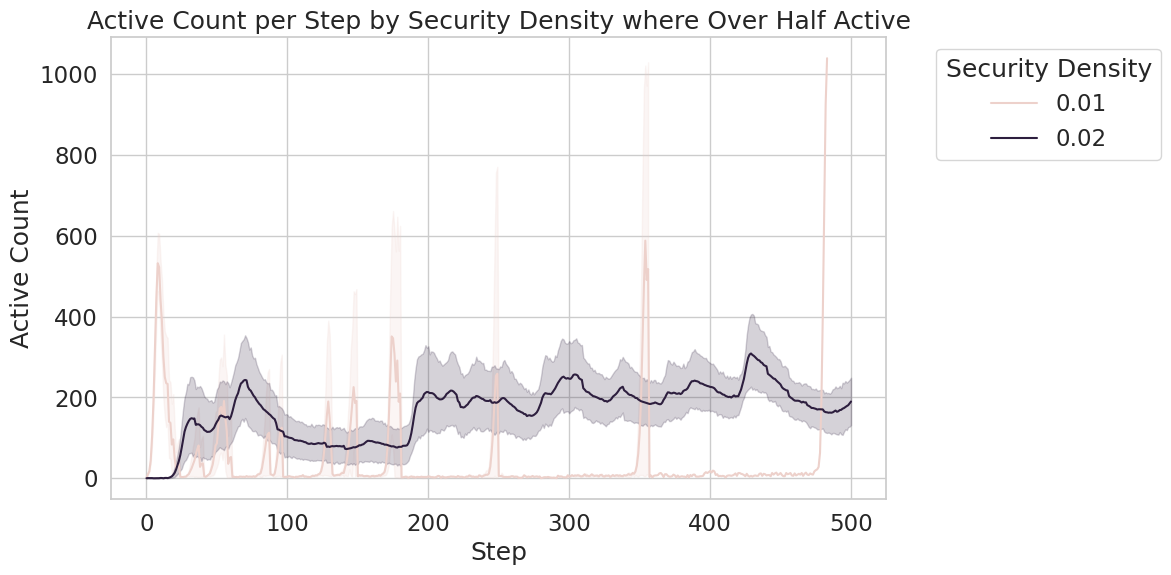

4.18459


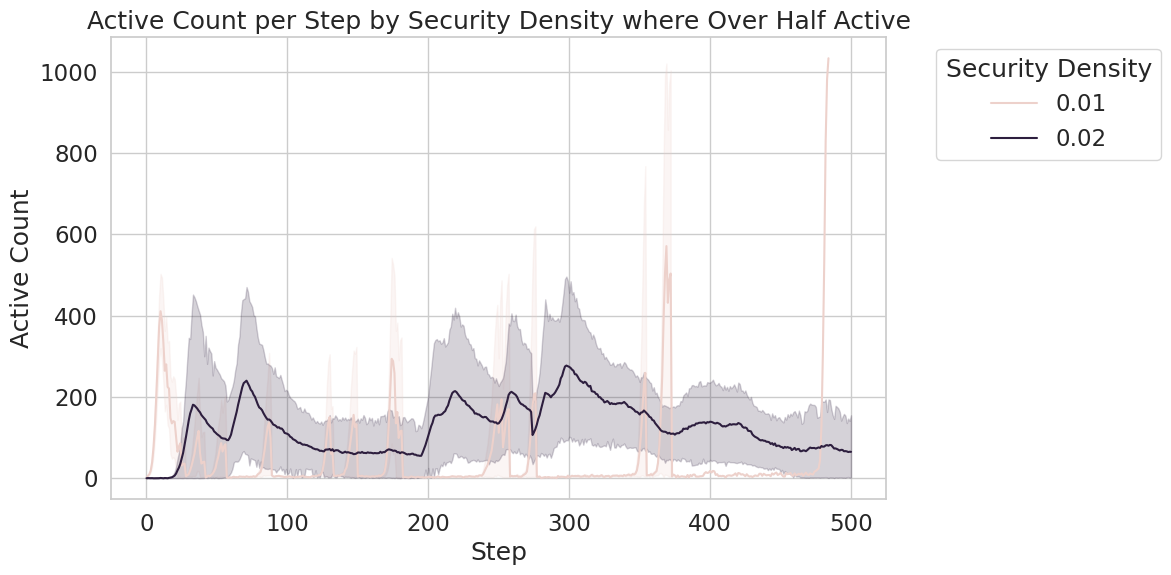

4.59512


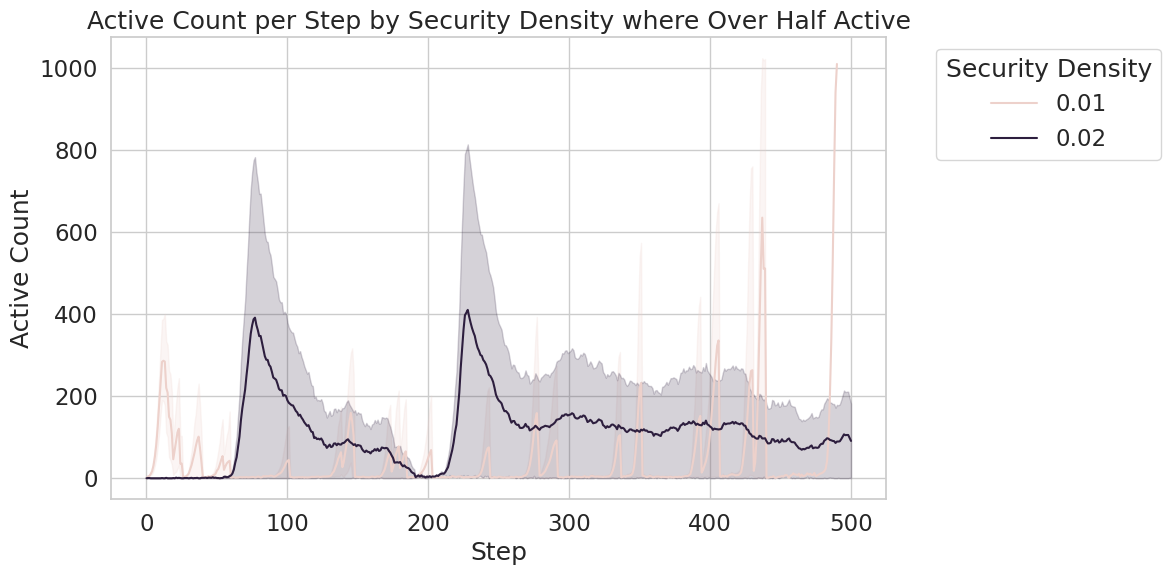

In [167]:
for threshold in sorted(df['Threshold'].unique()):
    print(threshold)
    pf.over_half_active_count_sd_plot(df[df['Threshold'] == threshold], str(threshold))

0.0


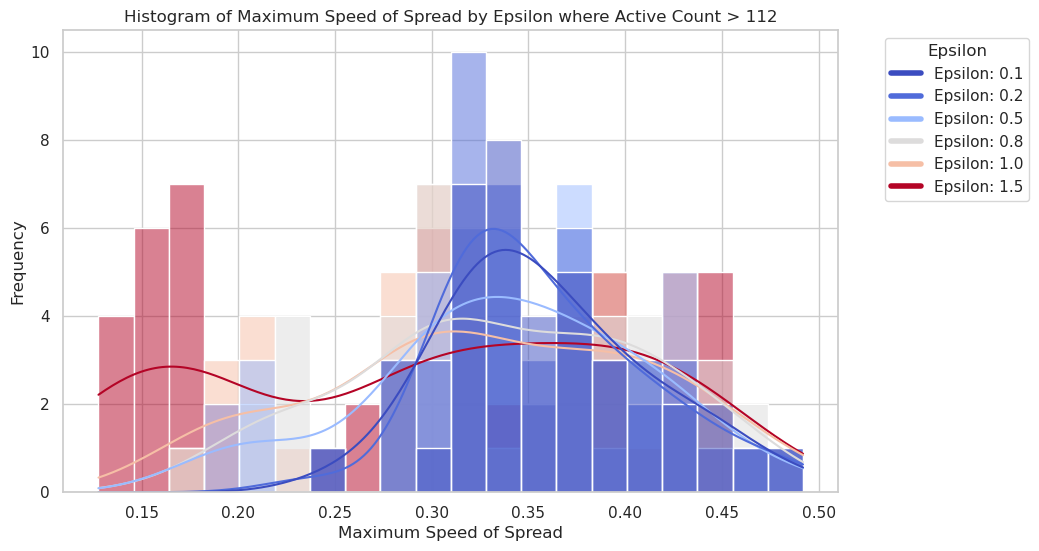

1.38629


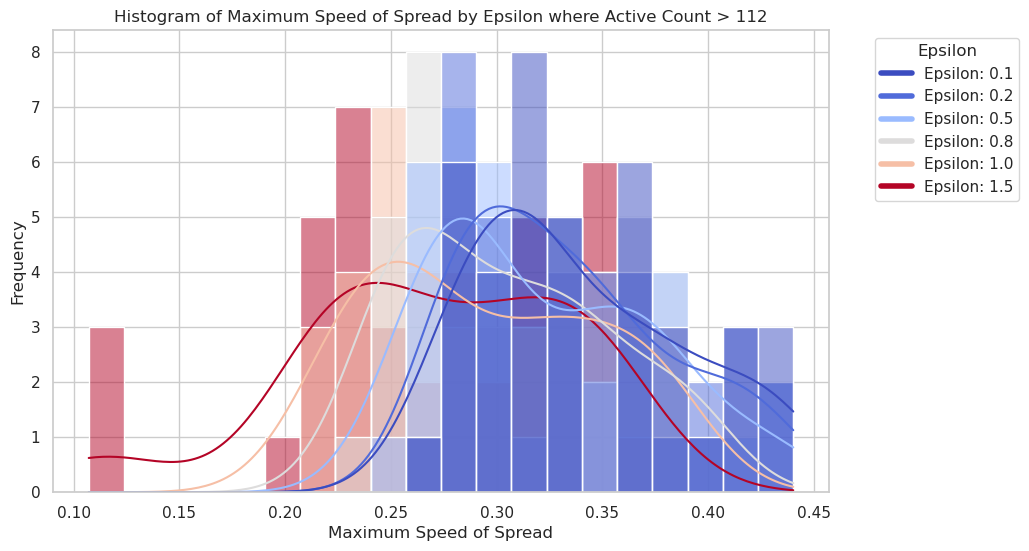

1.7346


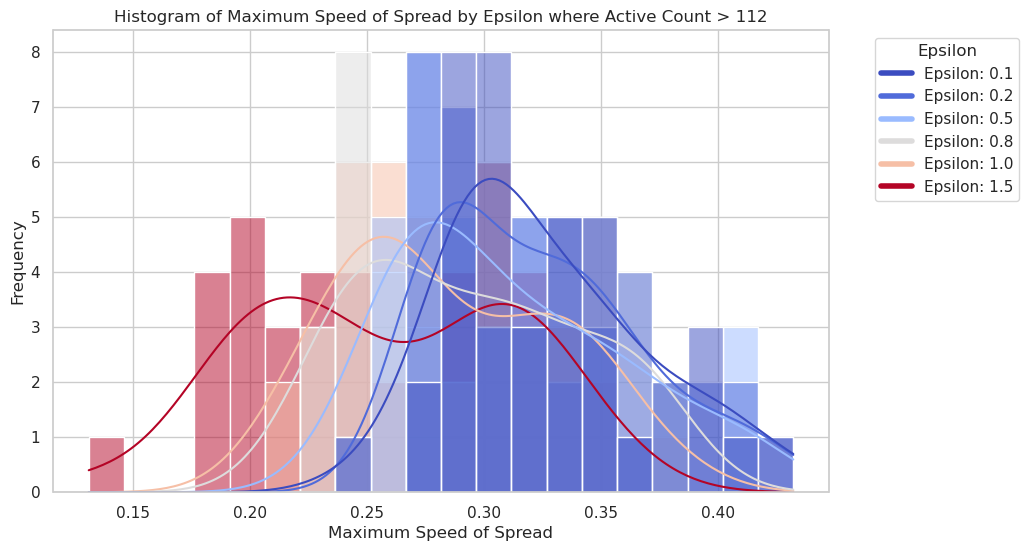

2.19722


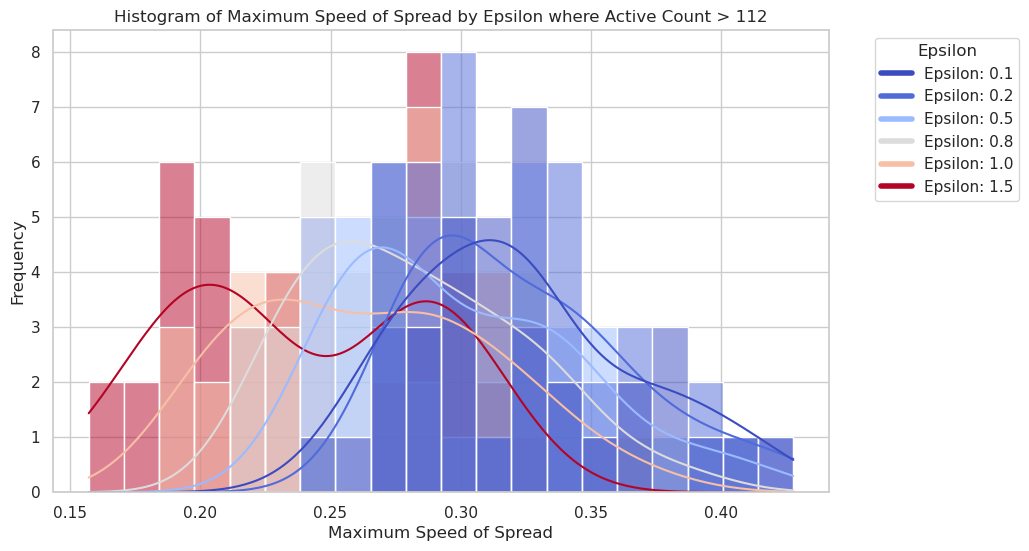

2.94444


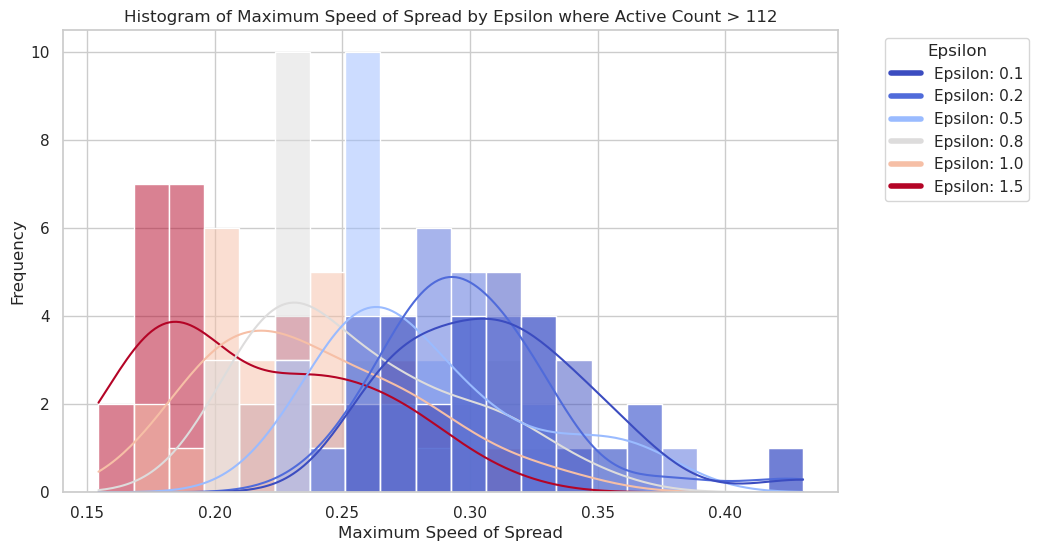

3.66356


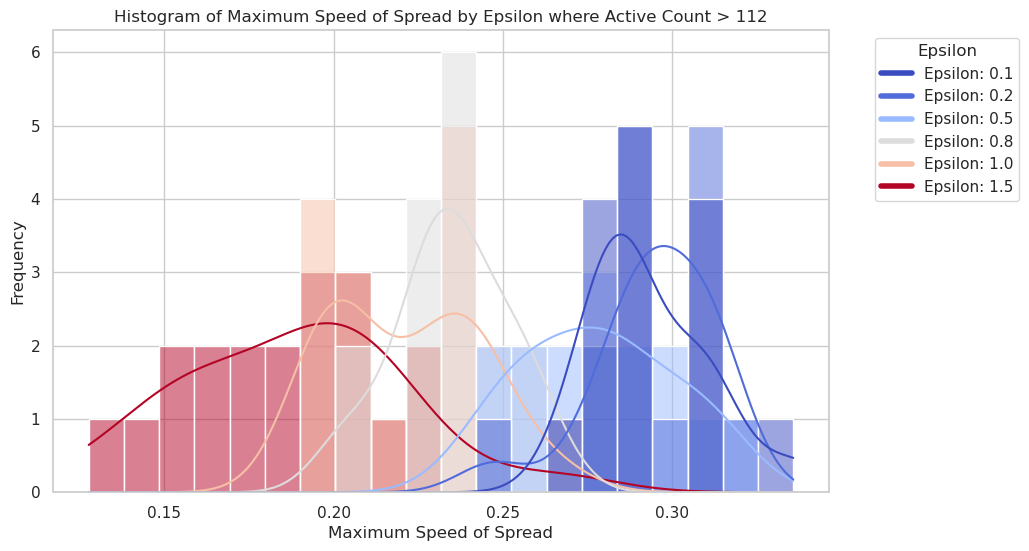

4.18459


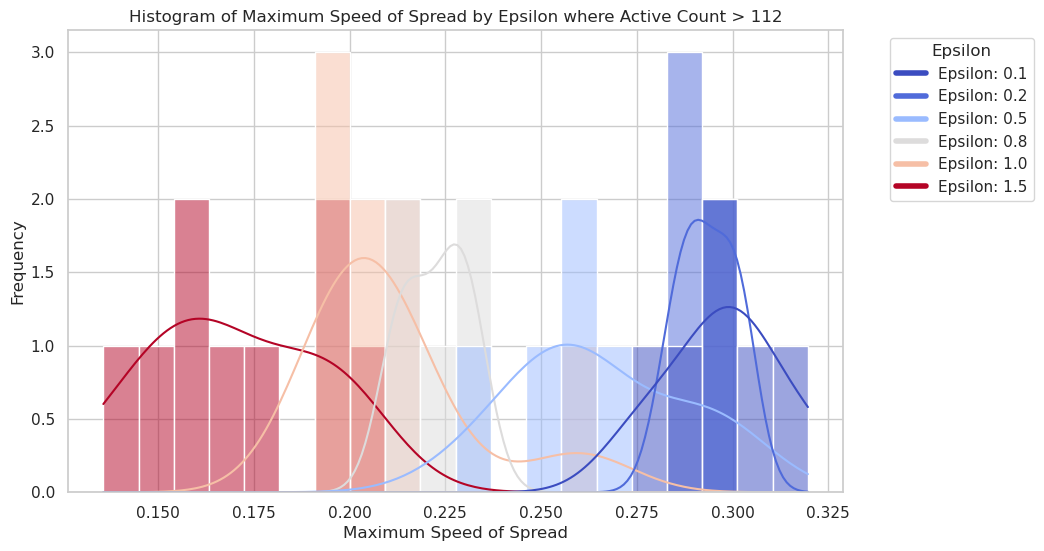

4.59512


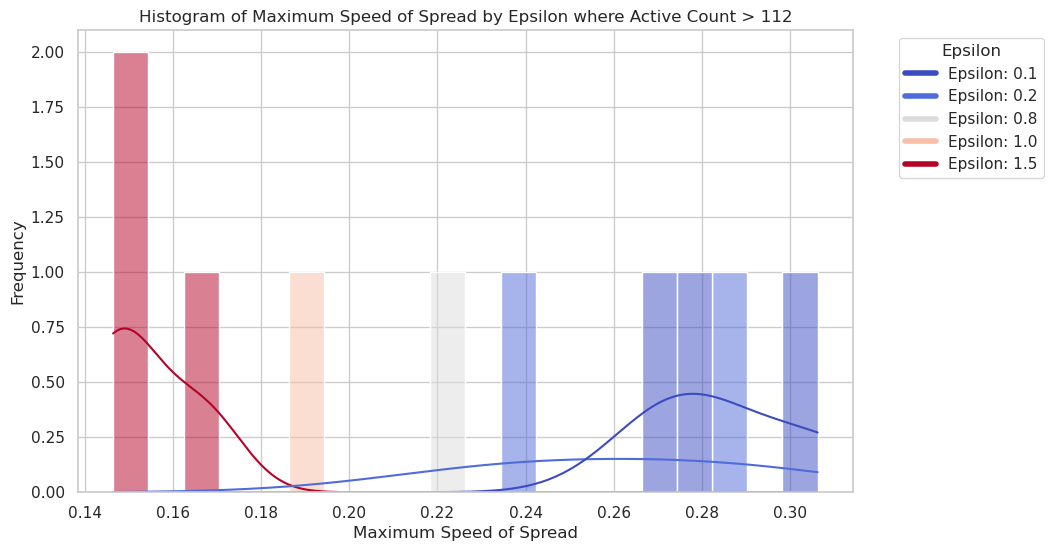

In [66]:
for threshold in sorted(df['Threshold'].unique()):
    print(threshold)
    pf.histogram_over_112(df[df['Threshold'] == threshold], str(threshold))

0.0


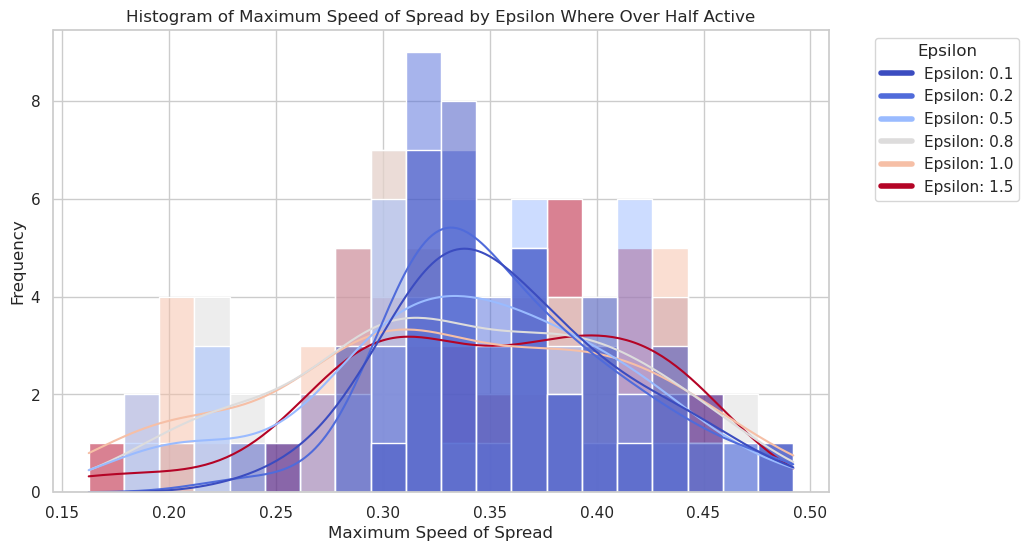

1.38629


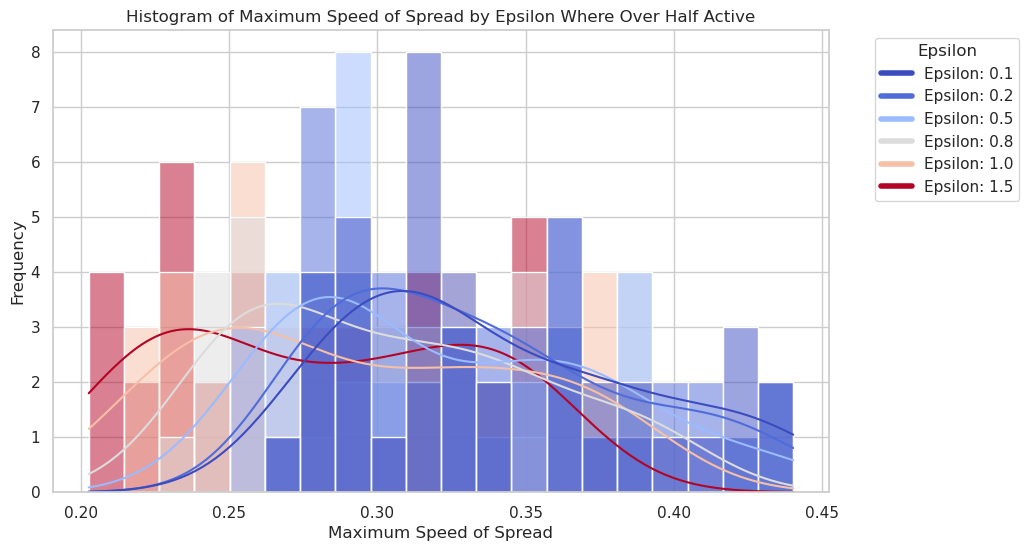

1.7346


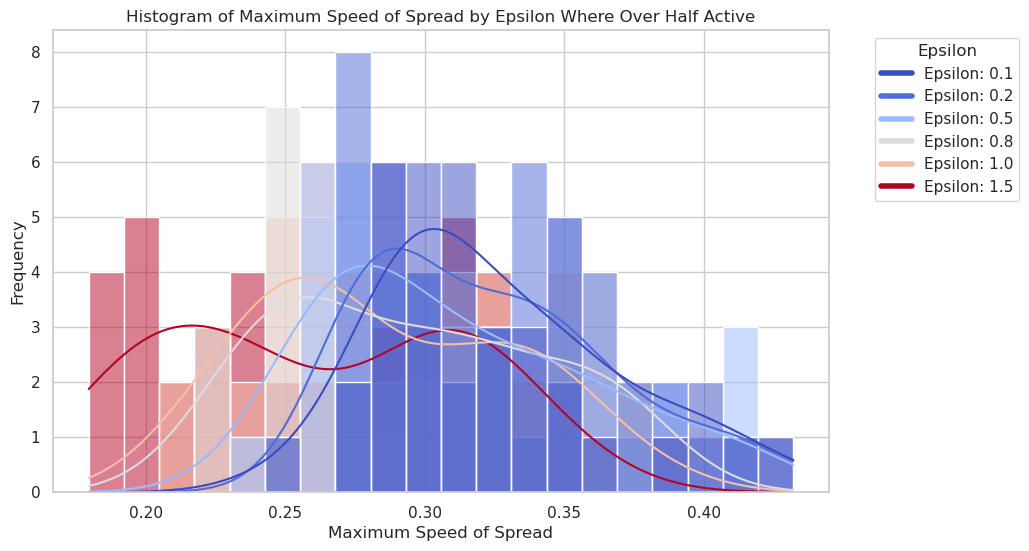

2.19722


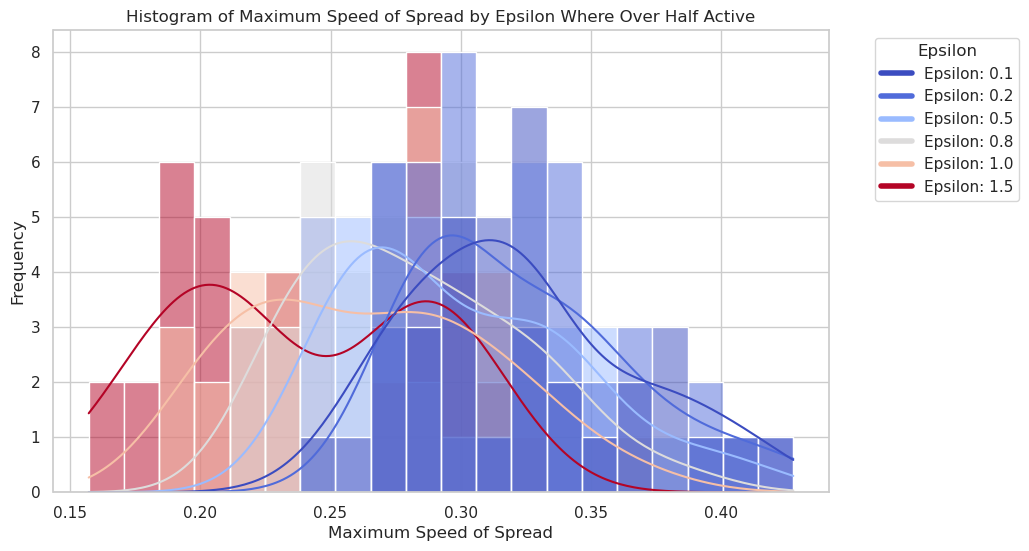

2.94444


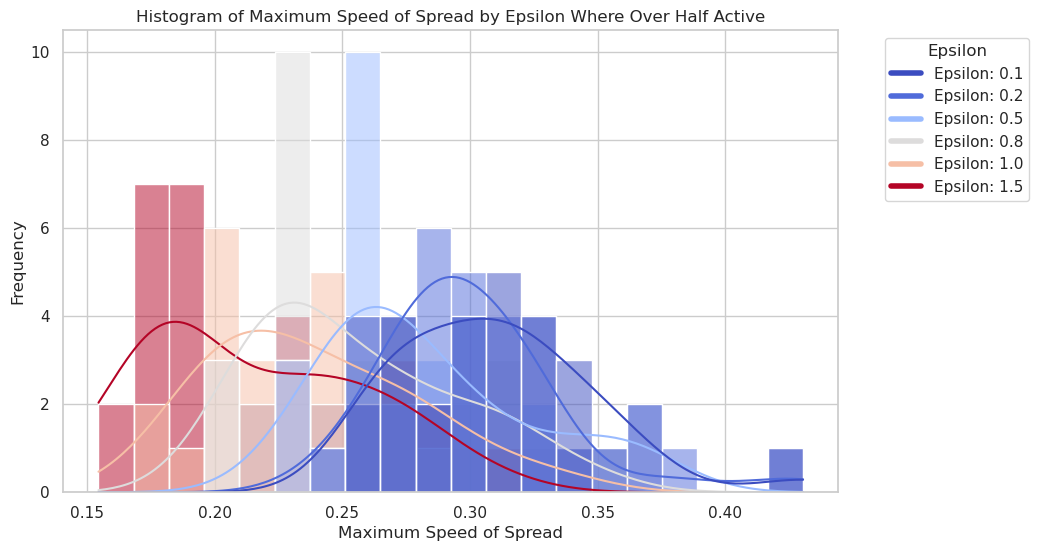

3.66356


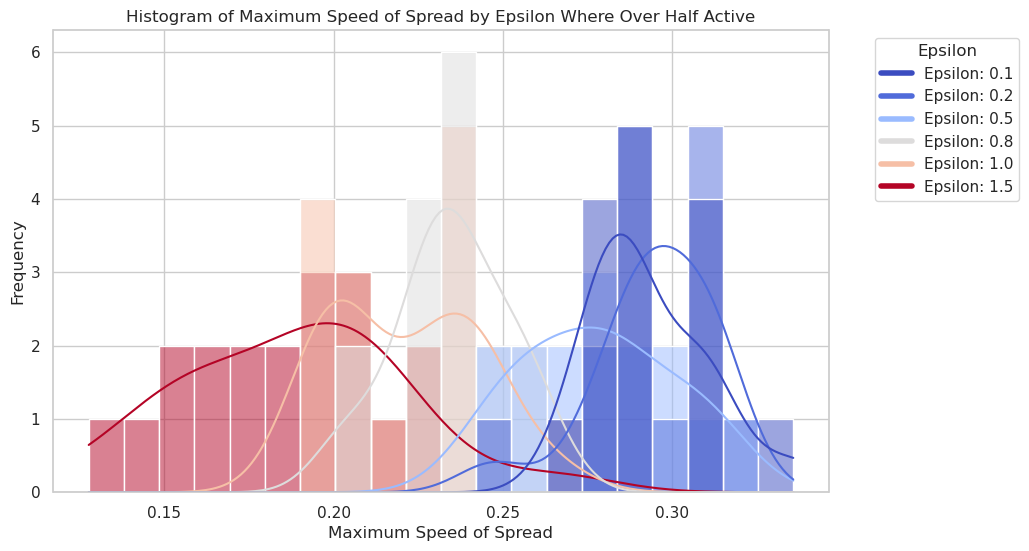

4.18459


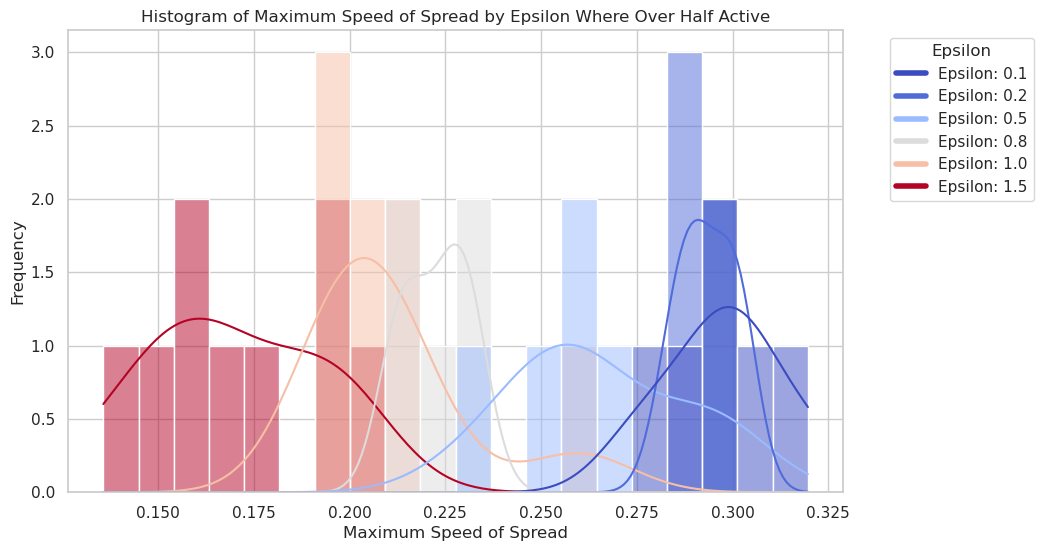

4.59512


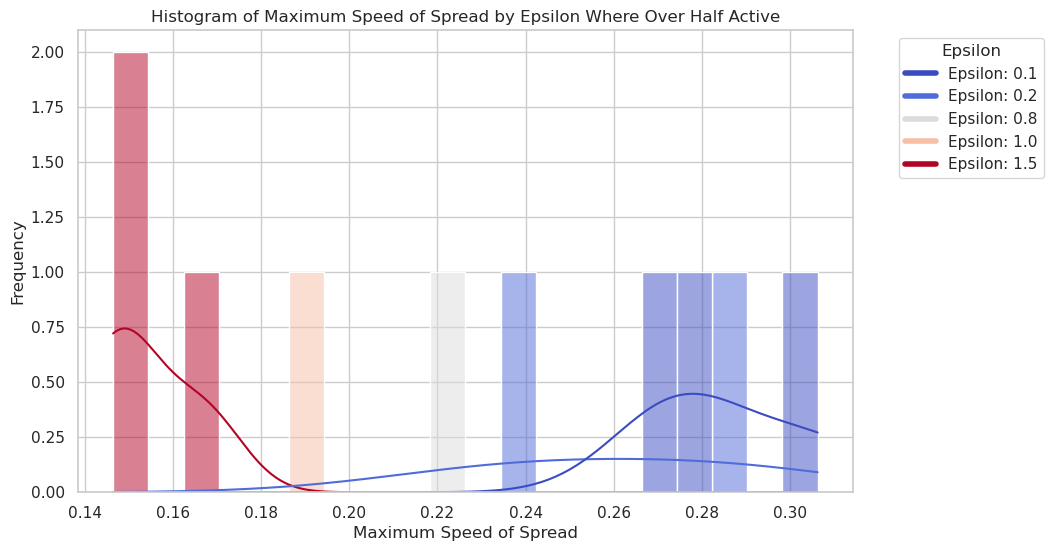

In [67]:
for threshold in sorted(df['Threshold'].unique()):
    print(threshold)
    pf.histogram_over_half(df[df['Threshold'] == threshold], str(threshold))

# Fluctions

In [69]:
fluctuating_models = pf.check_for_ratio_fluctuations(df, 0.05, 0.1)
print(f'Models with fluctuating active ratios: {fluctuating_models}') 

Models with fluctuating active ratios: {'Seed 993 SD0.04 PP -0.8 EP 1 Th 0', 'Seed 992 SD0.04 PP -0.8 EP 1.5 Th 0', 'Seed 991 SD0.04 PP -1 EP 1 Th 0', 'Seed 990 SD0.04 PP -1 EP 1.5 Th 0', 'Seed 990 SD0.02 PP -0.8 EP 1.5 Th 2.94444', 'Seed 992 SD0.04 PP -0.8 EP 1 Th 0', 'Seed 993 SD0.04 PP -1 EP 1.5 Th 0', 'Seed 991 SD0.02 PP -0.5 EP 1.5 Th 2.94444', 'Seed 991 SD0.04 PP -0.8 EP 1 Th 0', 'Seed 992 SD0.04 PP -0.5 EP 1.5 Th 0', 'Seed 993 SD0.04 PP -0.5 EP 1.5 Th 0', 'Seed 993 SD0.02 PP 0 EP 1.5 Th 1.7346', 'Seed 992 SD0.04 PP 0 EP 1.5 Th 0', 'Seed 990 SD0.04 PP -0.5 EP 1.5 Th 0', 'Seed 993 SD0.02 PP -0.3 EP 1.5 Th 2.19722', 'Seed 993 SD0.04 PP -1 EP 0.5 Th 0', 'Seed 990 SD0.04 PP -0.3 EP 1.5 Th 0', 'Seed 993 SD0.04 PP -0.8 EP 1.5 Th 0', 'Seed 992 SD0.02 PP -0.3 EP 1.5 Th 1.7346', 'Seed 991 SD0.04 PP -1 EP 1.5 Th 0', 'Seed 992 SD0.02 PP -0.5 EP 1.5 Th 2.94444', 'Seed 991 SD0.04 PP -0.8 EP 0.8 Th 0', 'Seed 993 SD0.04 PP -1 EP 1 Th 0', 'Seed 991 SD0.02 PP -0.3 EP 1.5 Th 2.19722', 'Seed 991 SD

0.0


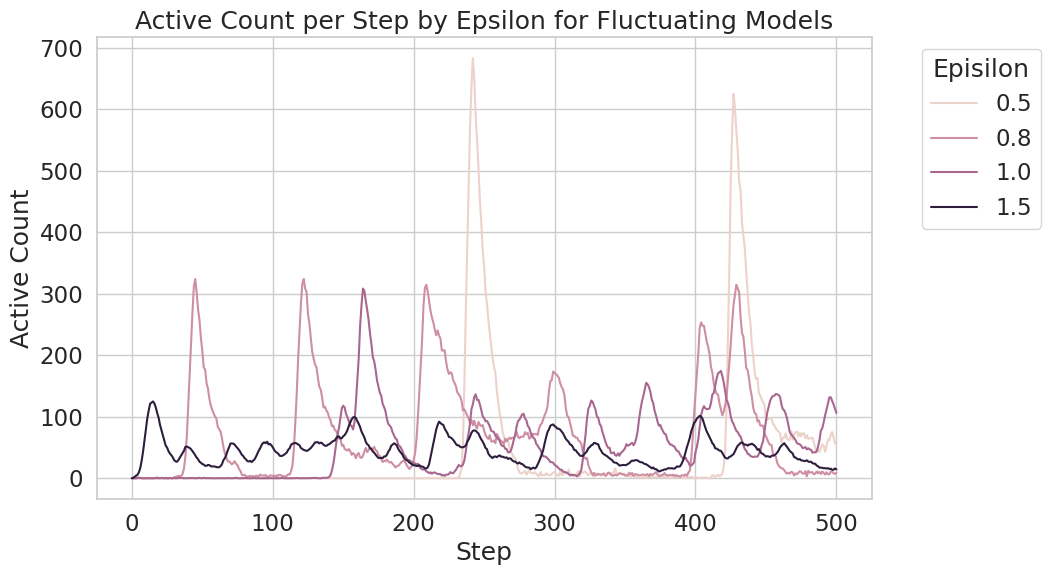

1.38629


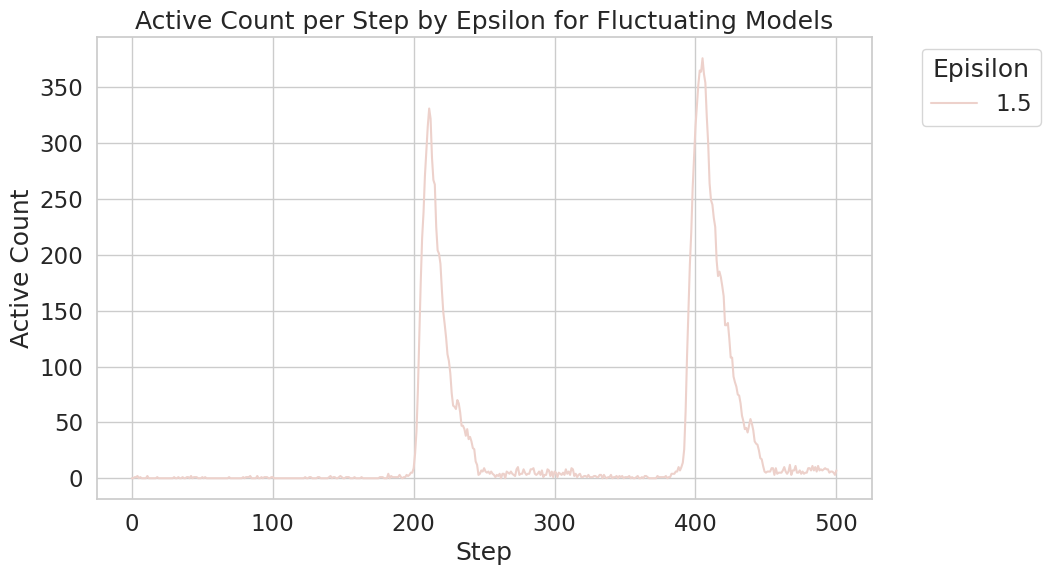

1.7346


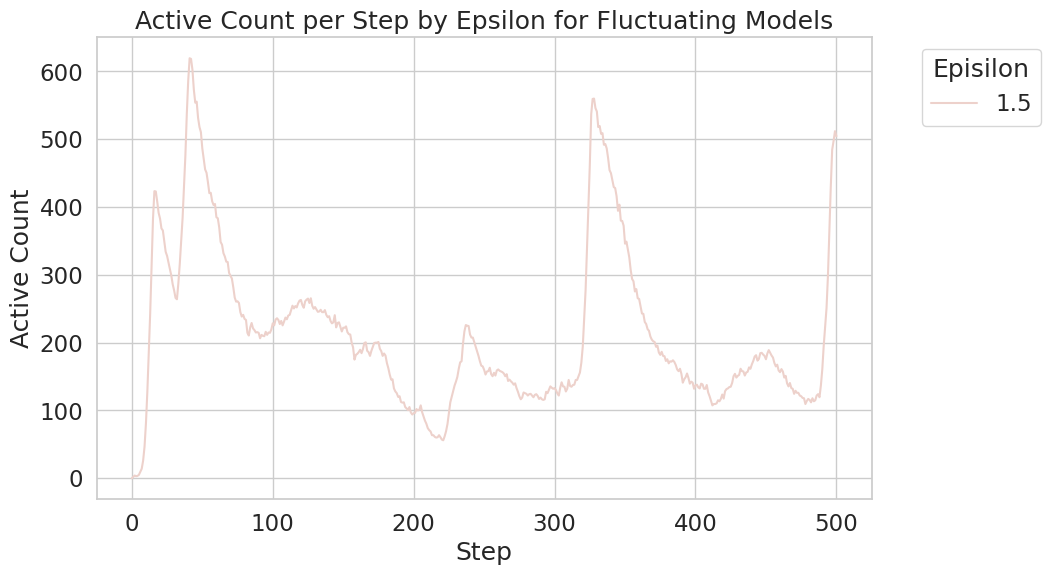

2.19722


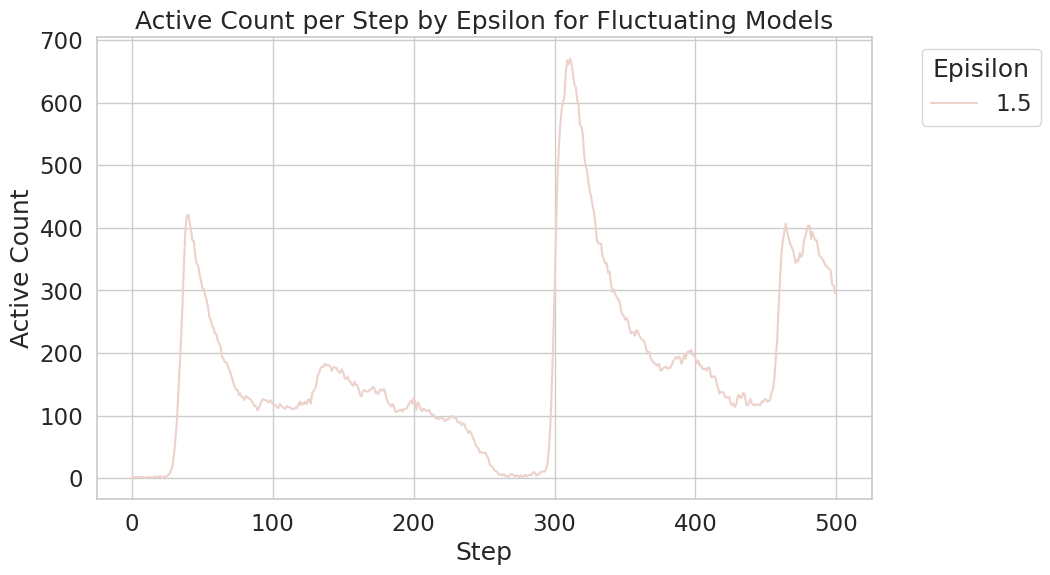

2.94444


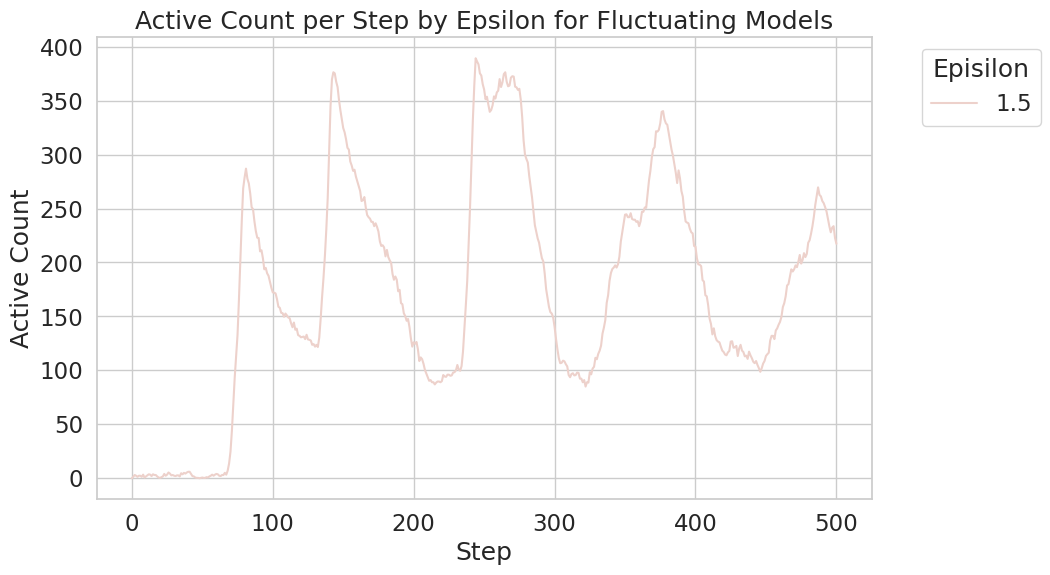

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


3.66356


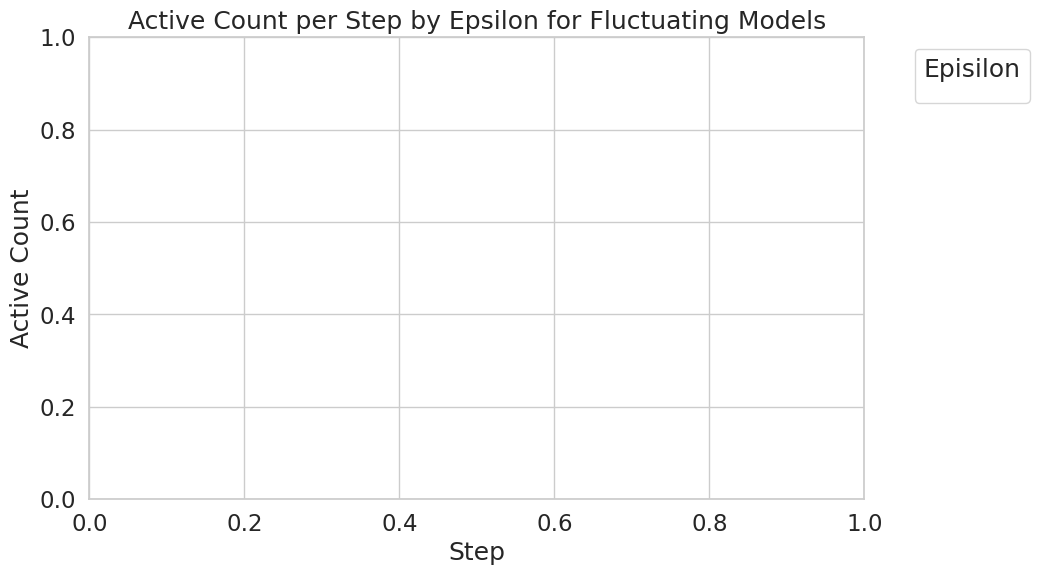

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


4.18459


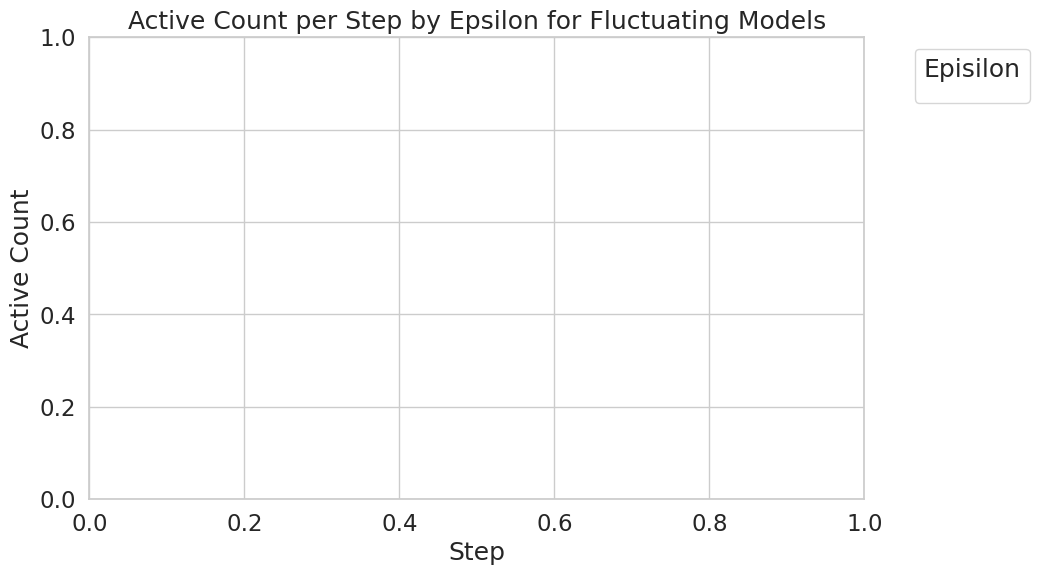

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


4.59512


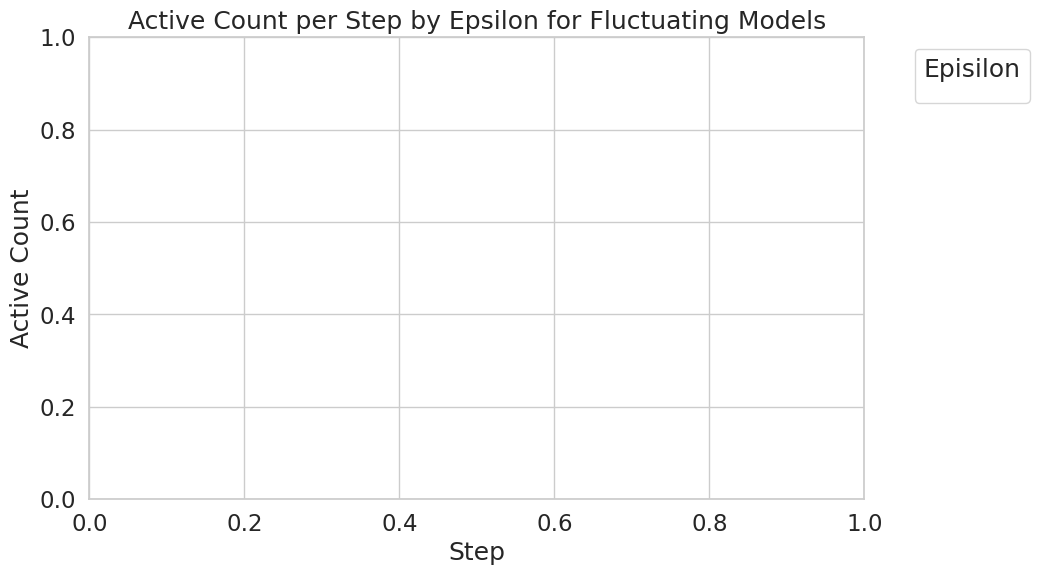

In [70]:
for threshold in sorted(df['Threshold'].unique()):
    print(threshold)
    pf.fluctuate_active_plot(df[df['Threshold'] == threshold], fluctuating_models, str(threshold))

0.0


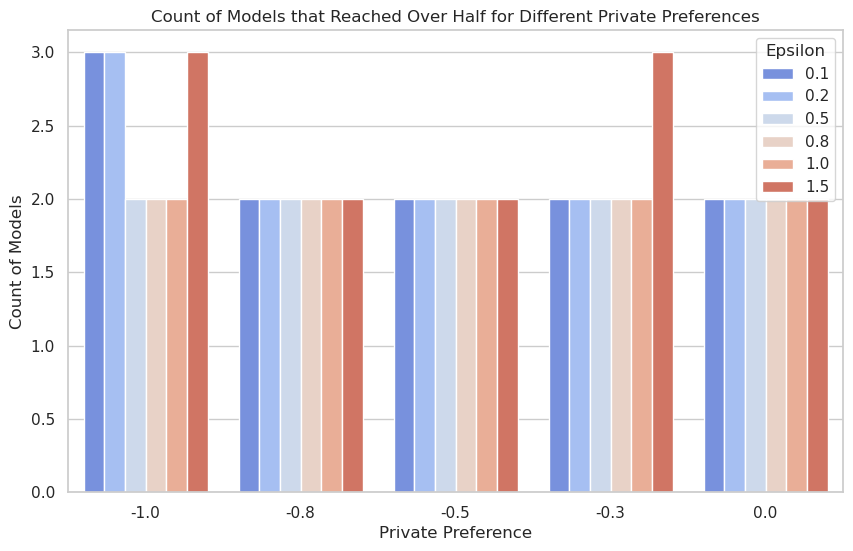

1.38629


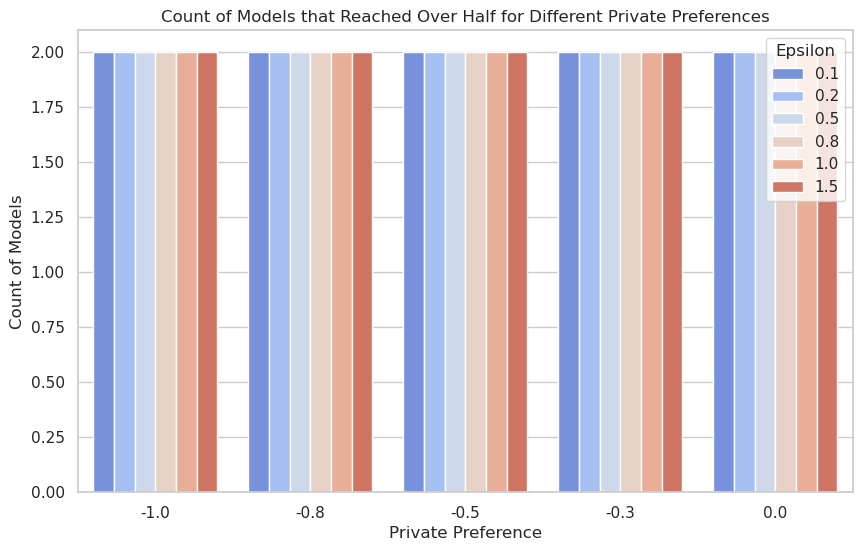

1.7346


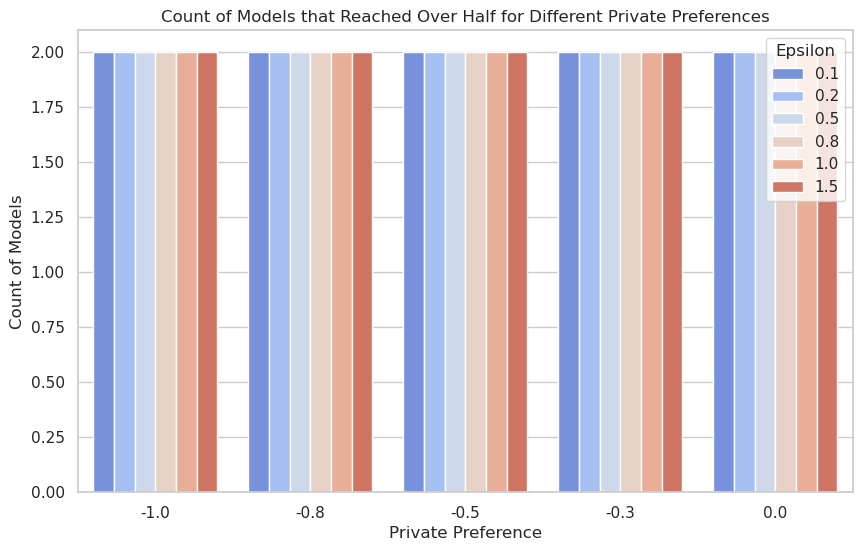

2.19722


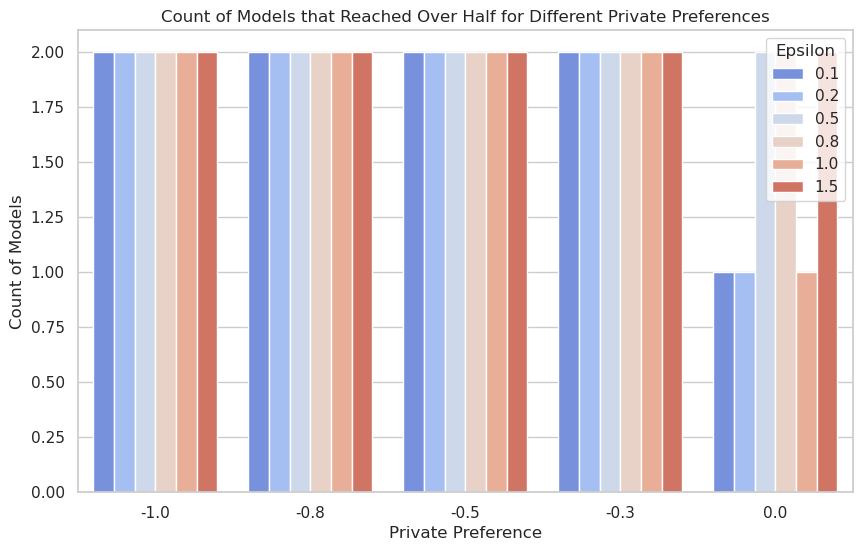

2.94444


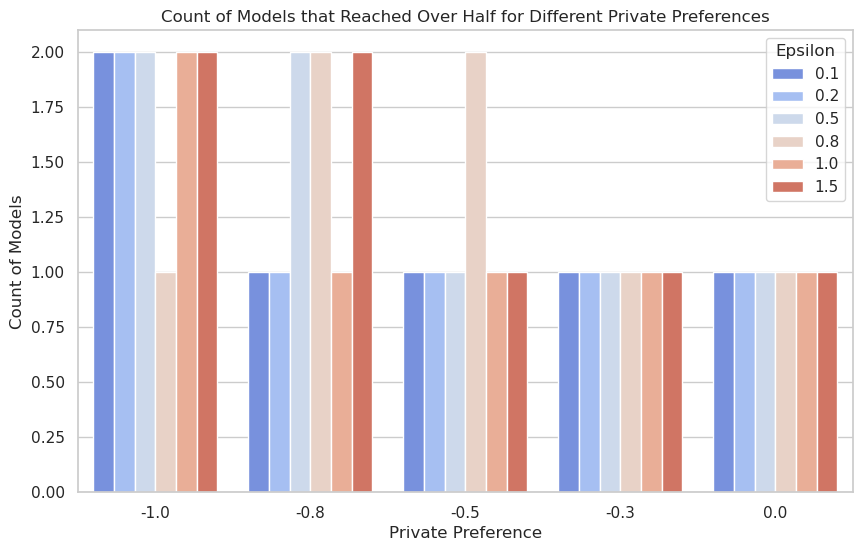

3.66356


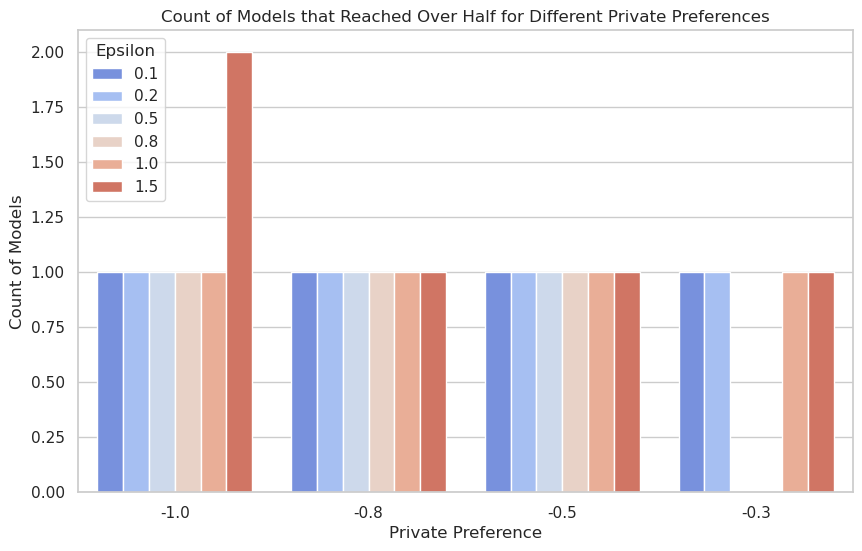

4.18459


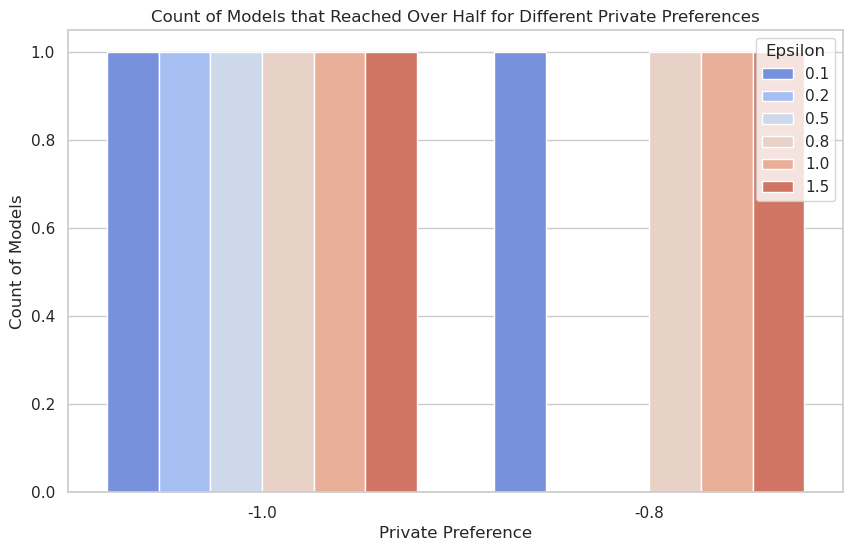

4.59512


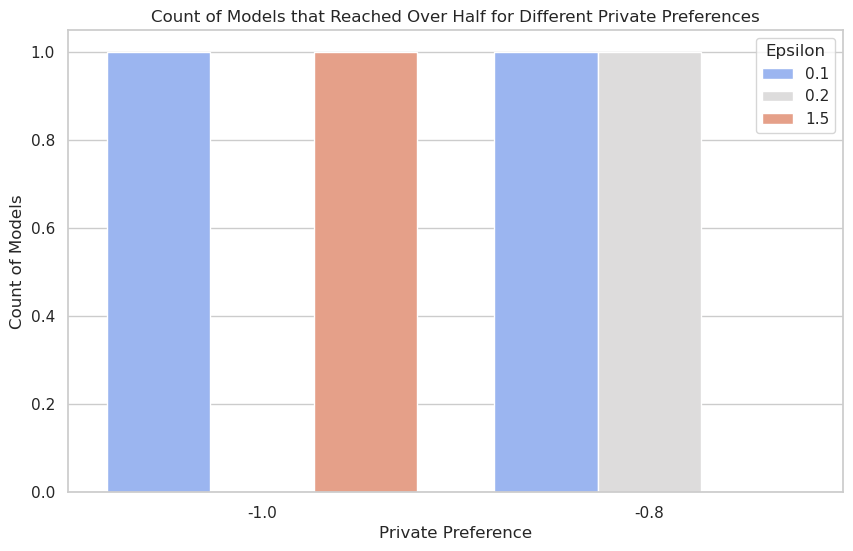

In [36]:
for threshold in sorted(df['Threshold'].unique()):
    print(threshold)
    pf.count_over_half_private_preference(df[df['Threshold'] == threshold], str(threshold))

In [38]:
ag_df = pd.read_parquet('data/2023-04-23/agent/agent_seed_990_pp_-0.3_sd0.02_ep_0.1_th3.66356.parquet')

In [39]:
ag_df = ag_df[ag_df['Step'] == 1]

pos condition   opinion  activation  private_preference  \
Step AgentID                                                                 
0    1         [32, 2]   Support  0.568170    0.638341           -0.561760   
     2        [39, 32]   Support  0.718216    0.672214           -0.712534   
     3        [17, 30]   Support -0.446887    0.390101            0.453060   
     4        [32, 28]   Support  1.983348    0.879038           -1.977059   
     5         [7, 20]   Support  0.111402    0.527822           -0.104049   

               epsilon  oppose_threshold  active_threshold  jail_sentence  \
Step AgentID                                                                
0    1       -0.174957          3.632294          3.985163            0.0   
     2       -0.116111          3.387657          3.774393            0.0   
     3       -0.120513          3.652053          3.699442            0.0   
     4       -0.009901          3.664249          3.668275            0.0   
     5        0.097860          3.549051          3.616097            0.0   

              actives_in_vision  ... arrest_prob active_level  oppose_level  \
Step AgentID                     ...                                          
0    1                      1.0  ...    0.999997    -0.968228     -0.955385   
     2                      1.0  ...    1.000000    -0.955048     -0.935199   
     3                      1.0  ...    0.999824    -0.984248     -0.983505   
     4                      1.0  ...    0.999894    -0.843450     -0.842918   
     5                      1.0  ...    1.000000    -0.970821     -0.968861   

              flip  ever_flipped  model_seed  model_security_density  \
Step AgentID                                                           
0    1        None         False         990                    0.02   
     2        None         False         990                    0.02   
     3        None         False         990                    0.02   
     4        None         False         990                    0.02   
     5        None         False         990                    0.02   

             model_private_preference model_epsilon  model_threshold  
Step AgentID                                                          
0    1                           -0.3           0.1          3.66356  
     2                           -0.3           0.1          3.66356  
     3                           -0.3           0.1          3.66356  
     4                           -0.3           0.1          3.66356  
     5                           -0.3           0.1          3.66356  

[5 rows x 24 columns]

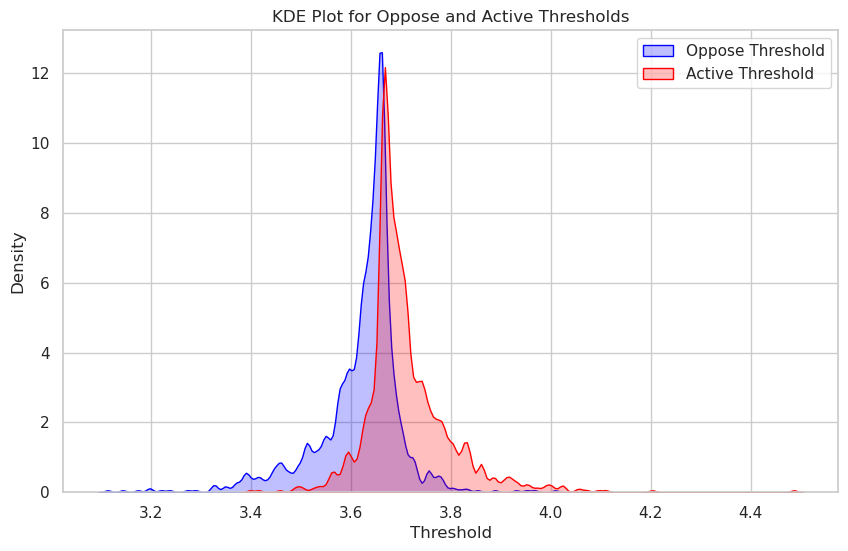

In [50]:
def plot_kde_thre(ag_df):
    # Set the style for the plot
    sns.set(style='whitegrid')

    # Create the KDE plot for oppose_threshold and active_threshold
    plt.figure(figsize=(10, 6))
    sns.kdeplot(ag_df['oppose_threshold'], color='blue', fill=True, label='Oppose Threshold')
    sns.kdeplot(ag_df['active_threshold'], color='red', fill=True, label='Active Threshold')


    # Customize the plot
    plt.title('KDE Plot for Oppose and Active Thresholds')
    plt.xlabel('Threshold')
    plt.ylabel('Density')
    plt.legend()


    # Display the plot
    plt.show()

# Replace "ag_df" with the actual DataFrame variable name
plot_kde_thre(ag_df)


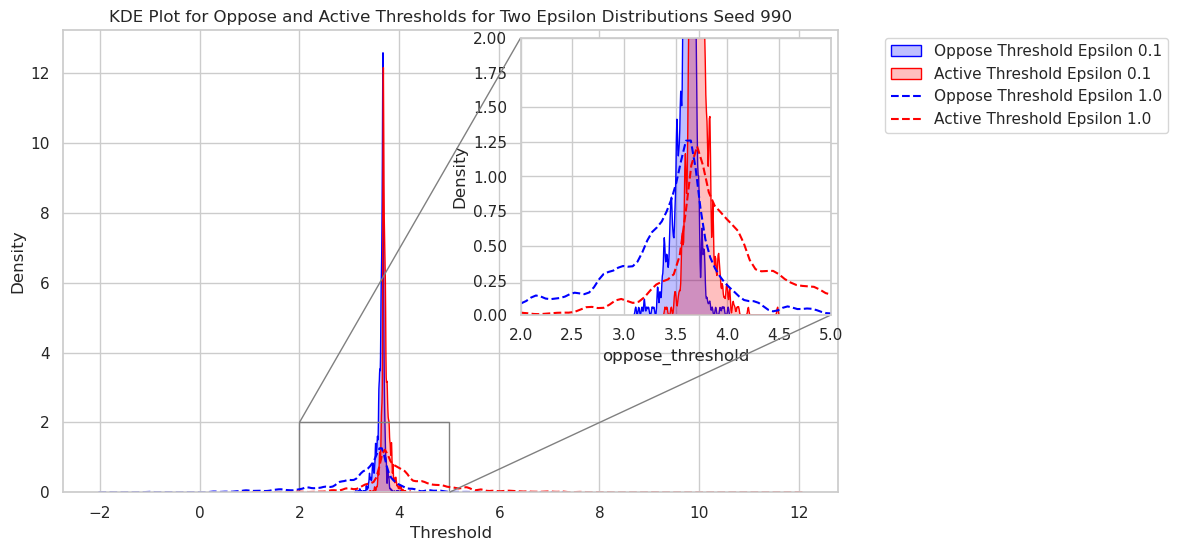

In [55]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

def plot_kde_thre(ag_df, ag_df_2):
    # Set the style for the plot
    sns.set(style='whitegrid')

    # Create the KDE plot for oppose_threshold and active_threshold
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(ag_df['oppose_threshold'], color='blue', fill=True, label='Oppose Threshold Epsilon 0.1', ax=ax)
    sns.kdeplot(ag_df['active_threshold'], color='red', fill=True, label='Active Threshold Epsilon 0.1', ax=ax)
    sns.kdeplot(ag_df_2['oppose_threshold'], color='blue', linestyle='--', fill=False, label='Oppose Threshold Epsilon 1.0', ax=ax)
    sns.kdeplot(ag_df_2['active_threshold'], color='red', linestyle='--', fill=False, label='Active Threshold Epsilon 1.0', ax=ax)

    # Customize the plot
    plt.title('KDE Plot for Oppose and Active Thresholds for Two Epsilon Distributions Seed 990')
    plt.xlabel('Threshold')
    plt.ylabel('Density')

    # Create the inset
    axins = inset_axes(ax, width="40%", height="60%", loc="upper right")
    sns.kdeplot(ag_df['oppose_threshold'], color='blue', fill=True, ax=axins)
    sns.kdeplot(ag_df['active_threshold'], color='red', fill=True, ax=axins)
    sns.kdeplot(ag_df_2['oppose_threshold'], color='blue', linestyle='--', fill=False, ax=axins)
    sns.kdeplot(ag_df_2['active_threshold'], color='red', linestyle='--', fill=False, ax=axins)

    # Set inset axis limits
    axins.set_xlim(2, 5)
    axins.set_ylim(0, 2)

    # Mark the region of the inset
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

    # Move the legend outside of the plot
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.savefig("Oppose Active Thresh 2 ep.png", dpi=300, bbox_inches="tight")

    # Display the plot
    plt.show()

plot_kde_thre(ag_df, ag_df_2)


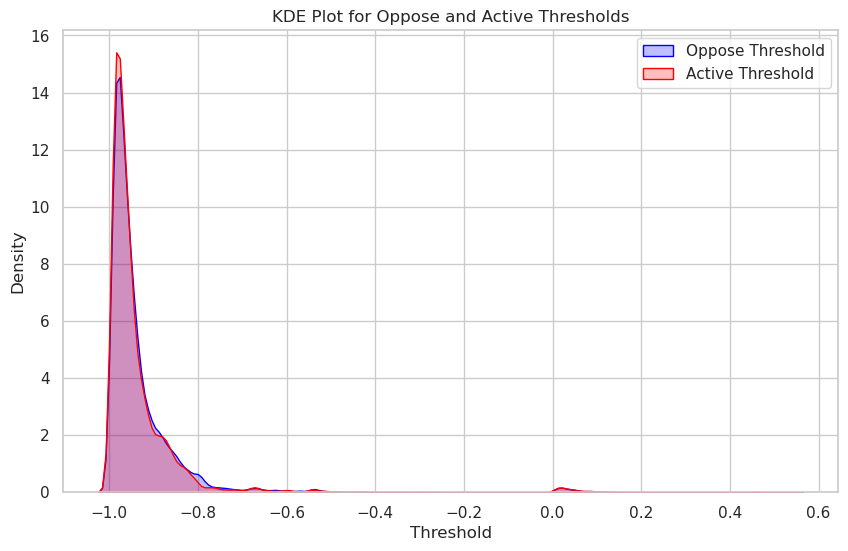

In [44]:
def plot_kde_act(ag_df):
    # Set the style for the plot
    sns.set(style='whitegrid')

    # Create the KDE plot for oppose_threshold and active_threshold
    plt.figure(figsize=(10, 6))
    sns.kdeplot(ag_df['oppose_level'], color='blue', fill=True, label='Oppose Threshold')
    sns.kdeplot(ag_df['active_level'], color='red', fill=True, label='Active Threshold')

    # Customize the plot
    plt.title('KDE Plot for Oppose and Active Thresholds')
    plt.xlabel('Threshold')
    plt.ylabel('Density')
    plt.legend()

    # Display the plot
    plt.show()

# Replace "ag_df" with the actual DataFrame variable name
plot_kde_act(ag_df)


In [45]:
ag_df_2 = pd.read_parquet('data/2023-04-23/agent/agent_seed_990_pp_-0.3_sd0.01_ep_1_th3.66356.parquet')
ag_df_2 = ag_df_2[ag_df_2['Step'] == 1]

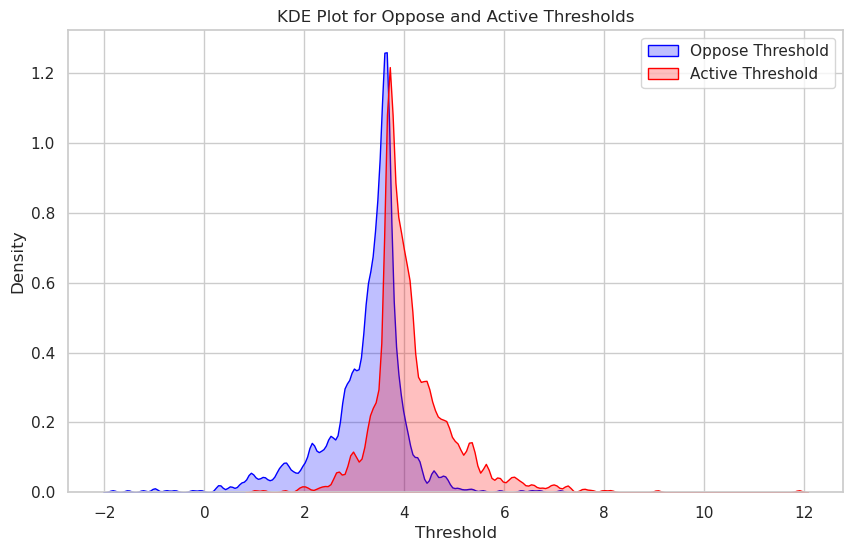

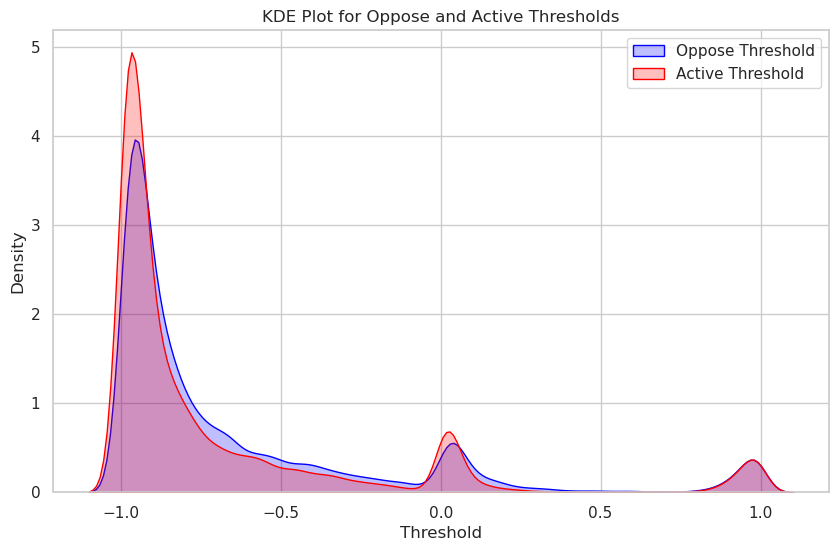

In [47]:
plot_kde_thre(ag_df_2)
plot_kde_act(ag_df_2)